In [ ]:
# 텍스트 분류
# 감성분석(감정분석)
# 텍스트 생성
# 텍스트 요약
# 토픽 모델링 (이 문서의 중요한 토픽이 무엇인가)

# --------------------------------
# 숫자, 특수문자, 문장부호 제거
# 조사, 어미 제외

# --------------------------------
# 형태소 분석 - 명사, 형용사
# 품사 태깅
# 불용어 사전


# 1. 텍스트 마이닝의 개요

In [1]:
#말뭉치(코퍼스, corpus) : 텍스트마이닝에 적용되는 텍스트 데이터 집합
#사전 처리
#대소문자 통일
#영문 텍스트 데이터는 대문자 또는 소문자로 변환하는 것이 좋음(보통 소문자로 변경)

s="Hello World"

print(s.lower()) #소문자로 변환
print(s.upper()) #대문자로 변환

hello world
HELLO WORLD


In [2]:
#숫자, 문장부호, 특수문자 제거
# 단어가 아니기 때문에 분석에 불필요한 경우가 대부분임
# 삭제할 경우 분석 결과가 왜곡된다고 생각될 경우 남겨둘 필요도 있음
# 날짜,수치,백분율 등의 숫자는 각각의 문장에서는 의미가 있지만
# 전체 문서 집합에서는 크게 의미가 없는 경우가 많으므로 지우는 것이 일반적

import re

#숫자 제거

p=re.compile("[0-9]+") # 정규표현식 패턴
result=p.sub("","올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다") # 패턴이 있으면 공백으로 바꾸기

print(result)

올해 들어 서울 지역의 부동산 가격이 % 하락했습니다


In [3]:
# . , ? ! 등의 문장부호들은 삭제하는 것이 일반적
# 각 문장에서는 특수한 역할을 수행할 수 있으나
# 전체 말뭉치의 관점에서는 의미를 부여하기 어려운 경우가 대부분임.
# - ( ) 등의 특수문자도 보통 삭제함

import re

def clean_text(input_data):
    #텍스트에 포함되어 있는 숫자와 특수문자 제거
    p=re.compile("[0-9_!@#$%^&*]")
    result=p.sub("",input_data)
    return result

txt = "올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123"

print(txt)
print(clean_text(txt))

올해 들어 서울 지역의 부동산 가격이 30% 하락했습니다!#$_$123
올해 들어 서울 지역의 부동산 가격이  하락했습니다


In [4]:
#불용어 처리
#불용어 : 빈번하게 사용되지만 구체적인 의미를 찾기 어려운 단어들
#영어의 경우 the, a, an 등의 관사는 많이 사용되지만
#텍스트마이닝에서는 특별한 의미를 부여하기 힘든 경우가 많음
#NLTK : 파이썬에서 많이 사용되는 텍스트마이닝 패키지
# 언어별로 불용어 리스트 제공, 한국어는 지원하지 않음
# 한국어 불용어 리스트를 제공하는 패키지는 아직 없으며
# 직접 만들거나 다른 분석가들이 작성한 리스트를 활용해야 함

words=["추석","연휴","민족","대이동","시작","늘어","교통량","교통사고","특히","자동차", "고장","상당수","나타","것","기자"]

#불용어
stopwords=["가다","늘어","나타","것","기자"]

#불용어 제거
[i for i in words if i not in stopwords]

['추석', '연휴', '민족', '대이동', '시작', '교통량', '교통사고', '특히', '자동차', '고장', '상당수']

In [6]:
# pip install nltk
#영어 불용어 처리
import nltk

nltk.download("stopwords")

from nltk.corpus import stopwords

words=["chief","justice","roberts",",","president","carter",",","president","clinton","president","bush","obama","fellow","americans","and","people","of","the","world","thank","you"]

[w for w in words if not w in stopwords.words("english")]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['chief',
 'justice',
 'roberts',
 ',',
 'president',
 'carter',
 ',',
 'president',
 'clinton',
 'president',
 'bush',
 'obama',
 'fellow',
 'americans',
 'people',
 'world',
 'thank']

In [7]:
import nltk

nltk.download("punkt") #문장 tokenizer 다운로드

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
#어근 동일화 처리 : 비슷한 어근 처리(stemming)
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stm = PorterStemmer()
txt="cook cooker cooking cooks cookery"
words=word_tokenize(txt)

for w in words:
    print(stm.stem(w),end=" ")

cook cooker cook cook cookeri 

In [11]:
stm=PorterStemmer()

#어근이 동일한 키워드 정리

txt="pythoning pythons Python pythoners pythoned"
words=word_tokenize(txt)

for w in words:
    print(stm.stem(w),end=" ")

python python python python python 

In [12]:
#LancasterStemmer : PorterStemmer와 비슷하지만 좀더 나은 성능
from nltk.stem.lancaster import LancasterStemmer

stm=LancasterStemmer()
txt="cook cooker cooking cooks cookery"
words=word_tokenize(txt)

for w in words:
    print(stm.stem(w),end=" ")

cook cook cook cook cookery 

In [13]:
stm=LancasterStemmer()
txt="pythoning pythons Python pythoners pythoned"
words=word_tokenize(txt)

for w in words:
    print(stm.stem(w),end=" ")

python python python python python 

In [14]:
#Porter나 Lancaster가 처리하지 못하는 경우에는
#RegexpStemmer를 사용하여 특정한 표현식을 일괄적으로 제거함
from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')

print(stm.stem('cooking'))
print(stm.stem('cookery'))
print(stm.stem('ingleside'))

cook
cookery
leside


In [15]:
stm=RegexpStemmer("python")
txt="pythoning pythons Python pythoners pythoned"
words=word_tokenize(txt)

for w in words:
    print(stm.stem(w),end=" ")

ing s Python ers ed 

In [16]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄
# 2회 바이그램, 3회 트라이그램, 보편적으로 영어에만 적용되며 바이그램이 주로 사용됨

txt = 'Hello'

# 2-gram이므로 문자열의 끝에서 한 글자 앞까지만 반복함

for i in range(len(txt) - 1):            
    # 현재 문자와 그다음 문자 출력
    print(txt[i], txt[i + 1], sep='')  

He
el
ll
lo


In [17]:
txt = 'this is python script'

# 공백을 기준으로 문자열을 분리하여 리스트로 저장
words = txt.split()                

# 2-gram이므로 리스트의 마지막에서 요소 한 개 앞까지만 반복함
for i in range(len(words) - 1):      
    # 현재 문자열과 그다음 문자열 출력
    print(words[i], words[i + 1])  

this is
is python
python script


In [18]:
txt = 'hello'
two_gram = zip(txt, txt[1:])

for i in two_gram:
    print(i[0], i[1], sep='')

he
el
ll
lo


In [19]:
txt = 'this is python script'
words = txt.split()
list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [20]:
from nltk import ngrams

sentence="I love you.  Good morning.  Good bye."
grams=ngrams(sentence.split(),2)

for gram in grams:
    print(gram,end=" ")



('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [21]:
sentence="I love you.  Good morning.  Good bye."
grams=ngrams(sentence.split(),3)

for gram in grams:
    print(gram,end=" ")

('I', 'love', 'you.') ('love', 'you.', 'Good') ('you.', 'Good', 'morning.') ('Good', 'morning.', 'Good') ('morning.', 'Good', 'bye.') 

In [22]:
#한국어 처리
#헌법 말뭉치

from konlpy.corpus import kolaw
#말뭉치에 포함된 파일 목록
kolaw.fileids()

['constitution.txt']

In [23]:
#헌법
c = kolaw.open('constitution.txt').read()

print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [24]:
#국회의안 말뭉치
from konlpy.corpus import kobill

kobill.fileids()

['1809890.txt',
 '1809891.txt',
 '1809892.txt',
 '1809893.txt',
 '1809894.txt',
 '1809895.txt',
 '1809896.txt',
 '1809897.txt',
 '1809898.txt',
 '1809899.txt']

In [25]:
d = kobill.open('1809890.txt').read()

print(d[:40])

지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [26]:
#품사 분석
# POS 태깅(Part-Of-Speech)
# 모든 언어에 명사,동사,형용사,부사는 공통적으로 존재함
#한나눔 패키지 - KAIST Semantic Web Research Center 개발
#    http://semanticweb.kaist.ac.kr/hannanum/
#pip install konlpy
#pip install tweepy==3.10.0
#pip install jpype1==1.0.2
#jdk8 버전 설치(java 최신버전은 잘 호환되지 않을 수 있음)

from konlpy.tag import Hannanum

han=Hannanum()
txt="""원/달러 환율이 3년 5개월 만에 최고치로 마감하고,
위안화 환율이 11년 만에 달러당 7위안을 넘었다.
원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다."""

#형태소 분석
print(han.morphs(txt))

['원', '/', '달러', '환율', '이', '3년', '5개월', '만', '에', '최고치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만', '에', '달러당', '7위', '안', '을', '넘', '었다', '.', '원', '/', '엔', '재정환율', '역시', '100엔', '당', '30원', '가까이', '뛰', '었다', '.']


In [27]:
print(han.nouns(txt)) #명사 추출

['원', '달러', '환율', '3년', '5개월', '만', '최고치', '마감', '위안화', '환율', '11년', '만', '달러당', '7위', '원', '엔', '재정환율', '100엔', '30원']


In [28]:
#형태소와 품사

print(han.pos(txt))

[('원', 'N'), ('/', 'S'), ('달러', 'N'), ('환율', 'N'), ('이', 'J'), ('3년', 'N'), ('5개월', 'N'), ('만', 'N'), ('에', 'J'), ('최고치', 'N'), ('로', 'J'), ('마감', 'N'), ('하고', 'J'), (',', 'S'), ('위안화', 'N'), ('환율', 'N'), ('이', 'J'), ('11년', 'N'), ('만', 'N'), ('에', 'J'), ('달러당', 'N'), ('7위', 'N'), ('안', 'X'), ('을', 'J'), ('넘', 'P'), ('었다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('엔', 'N'), ('재정환율', 'N'), ('역시', 'M'), ('100엔', 'N'), ('당', 'X'), ('30원', 'N'), ('가까이', 'M'), ('뛰', 'P'), ('었다', 'E'), ('.', 'S')]


In [29]:
print(han.tagset) #품사 목록

{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}


In [30]:
#꼬꼬마 패키지 - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발
#    http://kkma.snu.ac.kr/

from konlpy.tag import Kkma

kkm=Kkma()

print(kkm.morphs(txt)) #형태소 분석

['원', '/', '달러', '환율', '이', '3', '년', '5', '개월', '만', '에', '최고', '치', '로', '마감', '하', '고', ',', '위', '안화', '환율', '이', '11', '년', '만', '에', '달', '러', '당', '7', '위', '안', '을', '넘', '었', '다', '.', '원', '/', '엔', '재정', '환율', '역시', '100', '엔', '당', '30', '원', '가까이', '뛰', '었', '다', '.']


In [31]:
print(kkm.nouns(txt))

['원', '달러', '환율', '3', '3년', '년', '5', '5개월', '개월', '만', '최고', '마감', '위', '위안화', '안화', '11', '11년', '당', '7', '7위안', '안', '엔', '재정', '재정환율', '100', '100엔당', '엔', '30', '30원']


In [32]:
print(kkm.pos(txt))

[('원', 'NNM'), ('/', 'SP'), ('달러', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('3', 'NR'), ('년', 'NNM'), ('5', 'NR'), ('개월', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('최고', 'NNG'), ('치', 'XSN'), ('로', 'JKM'), ('마감', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), (',', 'SP'), ('위', 'NNG'), ('안화', 'NNG'), ('환율', 'NNG'), ('이', 'JKS'), ('11', 'NR'), ('년', 'NNM'), ('만', 'NNB'), ('에', 'JKM'), ('달', 'VV'), ('러', 'ECD'), ('당', 'NNG'), ('7', 'NR'), ('위', 'NNG'), ('안', 'NNG'), ('을', 'JKO'), ('넘', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF'), ('원', 'NNM'), ('/', 'SP'), ('엔', 'NNG'), ('재정', 'NNG'), ('환율', 'NNG'), ('역시', 'MAG'), ('100', 'NR'), ('엔', 'NNM'), ('당', 'NNG'), ('30', 'NR'), ('원', 'NNM'), ('가까이', 'MAG'), ('뛰', 'VV'), ('었', 'EPT'), ('다', 'EFN'), ('.', 'SF')]


In [33]:
print(kkm.tagset) #품사 목록

{'EC': '연결 어미', 'ECD': '의존적 연결 어미', 'ECE': '대등 연결 어미', 'ECS': '보조적 연결 어미', 'EF': '종결 어미', 'EFA': '청유형 종결 어미', 'EFI': '감탄형 종결 어미', 'EFN': '평서형 종결 어미', 'EFO': '명령형 종결 어미', 'EFQ': '의문형 종결 어미', 'EFR': '존칭형 종결 어미', 'EP': '선어말 어미', 'EPH': '존칭 선어말 어미', 'EPP': '공손 선어말 어미', 'EPT': '시제 선어말 어미', 'ET': '전성 어미', 'ETD': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JK': '조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKI': '호격 조사', 'JKM': '부사격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JX': '보조사', 'MA': '부사', 'MAC': '접속 부사', 'MAG': '일반 부사', 'MD': '관형사', 'MDN': '수 관형사', 'MDT': '일반 관형사', 'NN': '명사', 'NNB': '일반 의존 명사', 'NNG': '보통명사', 'NNM': '단위 의존 명사', 'NNP': '고유명사', 'NP': '대명사', 'NR': '수사', 'OH': '한자', 'OL': '외국어', 'ON': '숫자', 'SE': '줄임표', 'SF': '마침표, 물음표, 느낌표', 'SO': '붙임표(물결,숨김,빠짐)', 'SP': '쉼표,가운뎃점,콜론,빗금', 'SS': '따옴표,괄호표,줄표', 'SW': '기타기호 (논리수학기호,화폐기호)', 'UN': '명사추정범주', 'VA': '형용사', 'VC': '지정사', 'VCN': "부정 지정사, 형용사 '아니다'", 'VCP': "긍정 지정사, 서술격 조사 '이다'", 'VV': '동사', 'VX': '보조 용언', '

In [34]:
#트위터 패키지 - 트위터에서 개발, 2017년 이후 오픈코리안텍스트로 이름이 바뀜
#  https://github.com/twitter

from konlpy.tag import Okt

okt=Okt()

print(okt.morphs(txt)) #형태소 분석

['원', '/', '달러', '환율', '이', '3년', '5', '개월', '만에', '최고', '치', '로', '마감', '하고', ',', '\n', '위안화', '환율', '이', '11년', '만에', '달러', '당', '7위안', '을', '넘었다', '.', '\n', '원', '/', '엔', '재정', '환율', '역시', '100엔', '당', '30원', '가까이', '뛰었다', '.']


In [35]:
print(okt.nouns(txt))

['원', '달러', '환율', '개월', '최고', '치', '마감', '위안화', '환율', '달러', '원', '재정', '환율', '역시', '가까이']


In [36]:
print(okt.pos(txt))

[('원', 'Noun'), ('/', 'Punctuation'), ('달러', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('3년', 'Number'), ('5', 'Number'), ('개월', 'Noun'), ('만에', 'Josa'), ('최고', 'Noun'), ('치', 'Noun'), ('로', 'Josa'), ('마감', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('\n', 'Foreign'), ('위안화', 'Noun'), ('환율', 'Noun'), ('이', 'Josa'), ('11년', 'Number'), ('만에', 'Josa'), ('달러', 'Noun'), ('당', 'Suffix'), ('7위안', 'Number'), ('을', 'Foreign'), ('넘었다', 'Verb'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('원', 'Noun'), ('/', 'Punctuation'), ('엔', 'Josa'), ('재정', 'Noun'), ('환율', 'Noun'), ('역시', 'Noun'), ('100엔', 'Number'), ('당', 'Foreign'), ('30원', 'Number'), ('가까이', 'Noun'), ('뛰었다', 'Verb'), ('.', 'Punctuation')]


In [37]:
print(okt.tagset)

{'Adjective': '형용사', 'Adverb': '부사', 'Alpha': '알파벳', 'Conjunction': '접속사', 'Determiner': '관형사', 'Eomi': '어미', 'Exclamation': '감탄사', 'Foreign': '외국어, 한자 및 기타기호', 'Hashtag': '트위터 해쉬태그', 'Josa': '조사', 'KoreanParticle': '(ex: ㅋㅋ)', 'Noun': '명사', 'Number': '숫자', 'PreEomi': '선어말어미', 'Punctuation': '구두점', 'ScreenName': '트위터 아이디', 'Suffix': '접미사', 'Unknown': '미등록어', 'Verb': '동사'}


In [38]:
#어구 추출

print(okt.phrases(txt))

['달러', '달러 환율', '3년', '3년 5개월', '최고치', '마감', '위안화', '위안화 환율', '11년', '달러당', '달러당 7위안', '재정환율', '재정환율 역시', '재정환율 역시 100엔', '30원', '30원 가까이', '환율', '개월', '최고', '7위안', '재정', '역시', '100엔', '가까이']


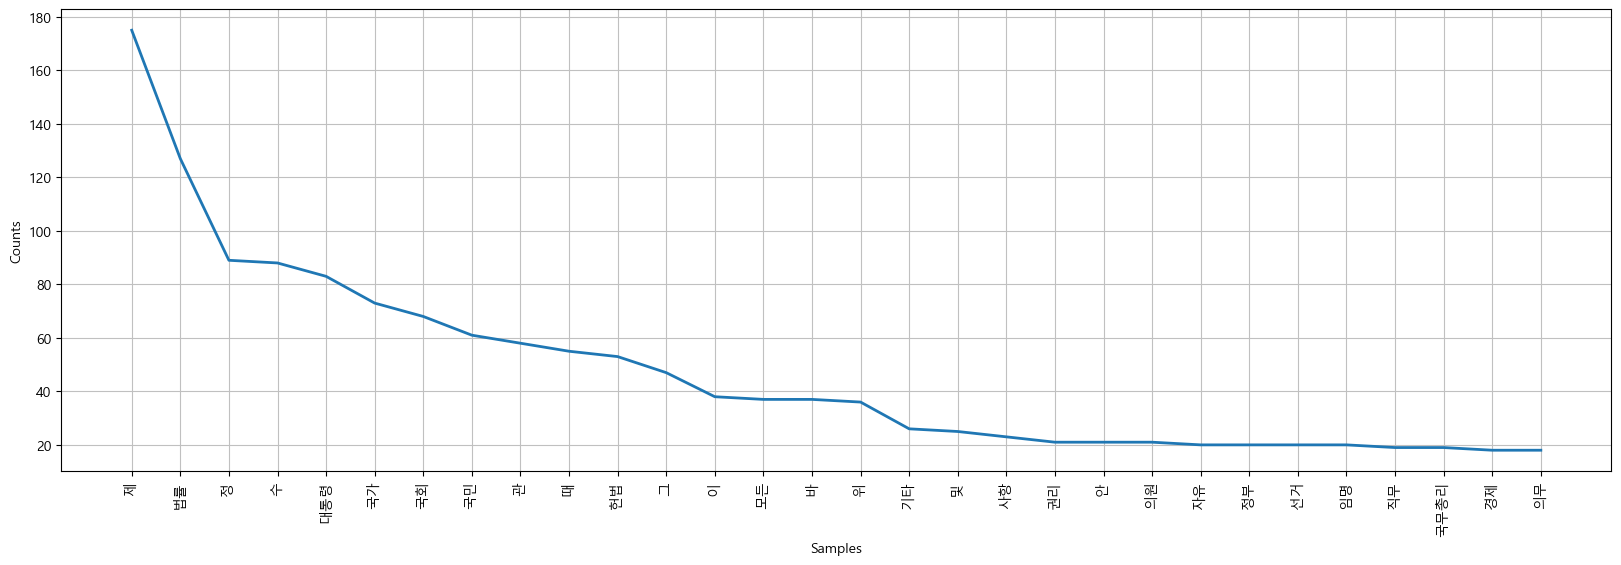

In [40]:
#단어 출현 빈도
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from nltk import Text

plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c), name="kolaw")
kolaw.plot(30)
plt.show()

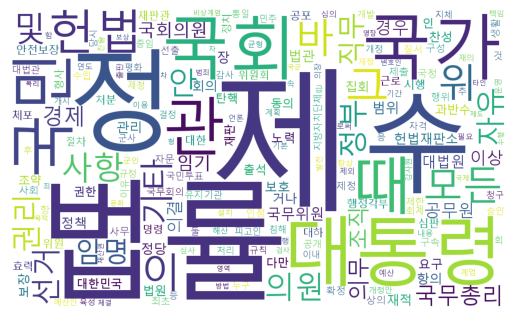

In [42]:
# 에러가 발생할 경우 
# visual studio 재배포 패키지 설치 후 (vc_redist_x64.exe)
# https://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud
# python 버전에 맞는 whl 파일 다운로드
# 로컬디렉토리에 있는 파일로 설치
# pip install wordcloud-버전-cp39-cp39-win_amd64.whl

from wordcloud import WordCloud

font_path = 'c:/windows/fonts/malgun.ttf'
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab())) # 단어 출현 빈도
plt.axis("off")
plt.show()

In [43]:
#영어 품사 분석
import nltk

nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [44]:
from nltk import pos_tag

a="I love you."
tags=pos_tag(a.split())
print(tags)

[('I', 'PRP'), ('love', 'VBP'), ('you.', 'RB')]


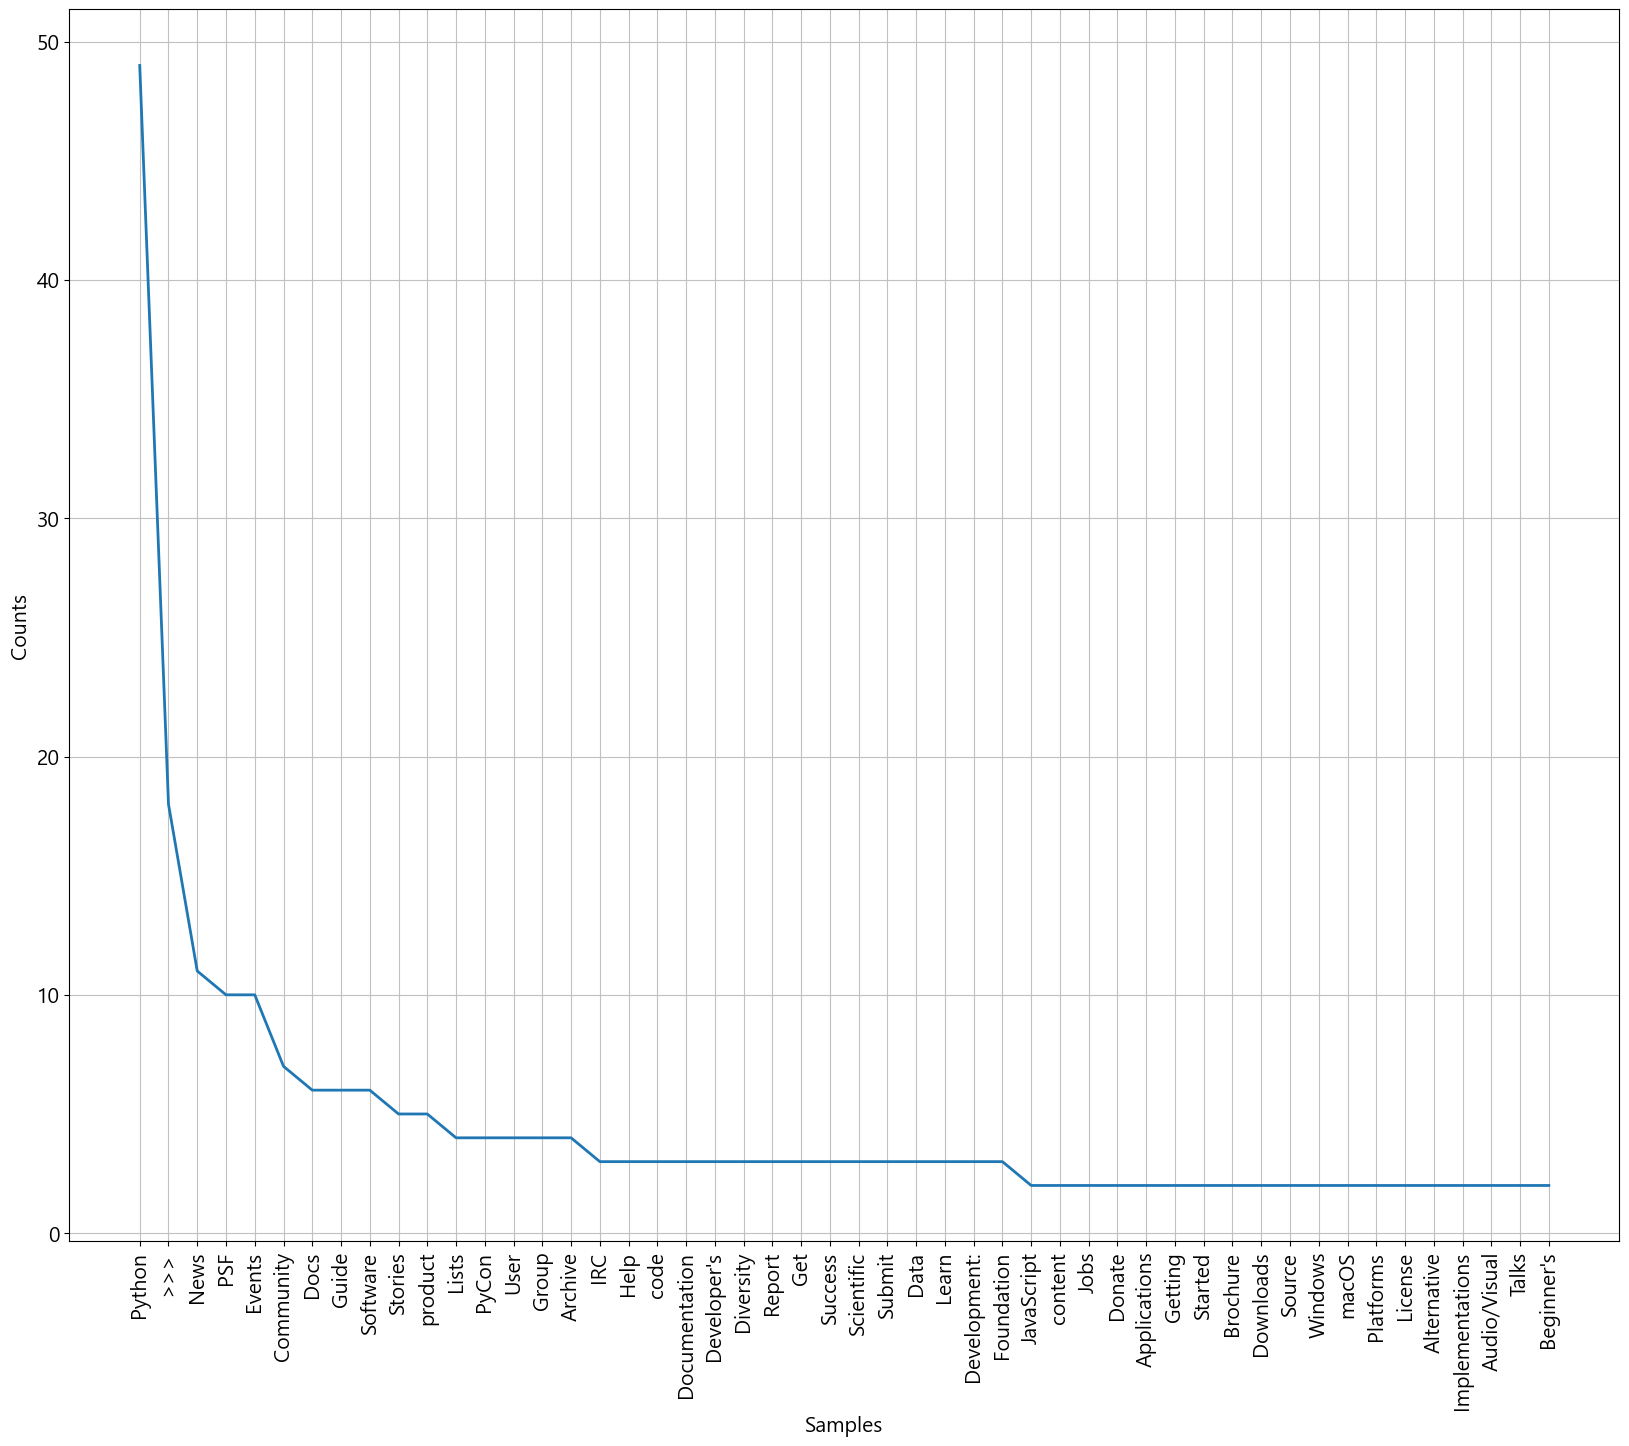

<Axes: xlabel='Samples', ylabel='Counts'>

In [45]:
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords  
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(20,16)
plt.rcParams["font.size"]=15

res=urllib.request.urlopen('http://python.org/')
html=res.read()

# \W+ : 알파벳,숫자,_(밑줄) 문자들만 선택
tokens=re.split('\W+',html.decode('utf-8'))
clean=BeautifulSoup(html,'html.parser').get_text()  
tokens=[token for token in clean.split()]
stop=set(stopwords.words('english'))
clean_tokens= [token for token in tokens
               if len(token.lower())>1 and (token.lower() not in stop)] 
                # 소문자로, 글자수 2글자 이상 / 불용어가 아닌
tagged=nltk.pos_tag(clean_tokens)

#보통명사, 고유명사만 추출
allnoun=[word for word,pos in tagged if pos in ['NN','NNP']] # 보통명사, 고유명사
freq_result = nltk.FreqDist(allnoun) # 단어의 출현빈도 호출하는 함수
freq_result.plot(50, cumulative=False)



# 2. NLTK 패키지

In [49]:
# 말뭉치(corpus) : 자연어 분석 작업을 위해 만든 문서 집합
import nltk

# NLTK 패키지에서 제공하는 샘플 말뭉치 다운로드, 시간이 많이 걸림
nltk.download("book", quiet=True)

True

In [50]:
from nltk.book import *

#저작권이 만료된 문학작품이 포함된 말뭉치
nltk.corpus.gutenberg.fileids()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [51]:
#제인 오스틴의 엠마 문서
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")

print(emma_raw[:500])



[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


In [52]:
# 자연어 문서를 분석하기 위해서는 우선 긴 문자열을 분석을 위한 작은 단위로 나누어야 한다.
# 이 문자열 단위를 토큰(token)이라고 하고
# 이렇게 문자열을 토큰으로 나누는 작업을 토큰 생성(tokenizing)이라고 함
# 영문의 경우에는 문장, 단어 등을 토큰으로 사용하거나 정규 표현식을 쓸 수 있다.
# 문자열을 토큰으로 분리하는 함수를 토큰 생성 함수(tokenizer)라고 한다.
# 토큰 생성 함수는 문자열을 입력받아 토큰 문자열의 리스트를 출력한다.

from nltk.tokenize import sent_tokenize

# 문장나누기
print(sent_tokenize(emma_raw[:1000])[3]) #3번 문장

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [53]:
from nltk.tokenize import word_tokenize

# 단어나누기
word_tokenize(emma_raw[50:100]) #50~99 단어

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [54]:
# 형태소 : 일정한 의미가 있는 가장 작은 말의 단위
# 형태소 분석(morphological analysis) :
#   단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어적 속성을 파악하고
#   이를 이용하여 형태소를 찾아내거나 처리하는 작업
# 어간 추출(stemming), 원형 복원(lemmatizing), 품사 부착(Part-Of-Speech tagging)
# 어간 추출(stemming) : 단어의 접미사나 어미를 제거
# 어간 추출법은 단순히 어미를 제거할 뿐이므로 단어의 원형의 정확히 찾아주지는 않는다.

In [55]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 =  LancasterStemmer()

words = ["fly", "flies", "flying", "flew", "flown"]

print( [st1.stem(w) for w in words] )
print( [st2.stem(w) for w in words] )

['fli', 'fli', 'fli', 'flew', 'flown']
['fly', 'fli', 'fly', 'flew', 'flown']


In [56]:
import nltk  

nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tjoeun\AppData\Roaming\nltk_data...


True

In [57]:
#원형 복원 : 같은 의미를 가지는 여러 단어를 사전형으로 통일하는 작업
#품사를 지정하는 경우 좀 더 정확한 원형을 찾을 수 있다.

from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
words = ["fly", "flies", "flying", "flew", "flown"]

#동사원형
[lm.lemmatize(w, pos="v") for w in words]

['fly', 'fly', 'fly', 'fly', 'fly']

In [58]:
#품사의 예
# NNP: 단수 고유명사
# VB: 동사
# VBP: 동사 현재형
# NN: 명사
#품사 목록

nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [59]:
#품사에 대한 설명
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


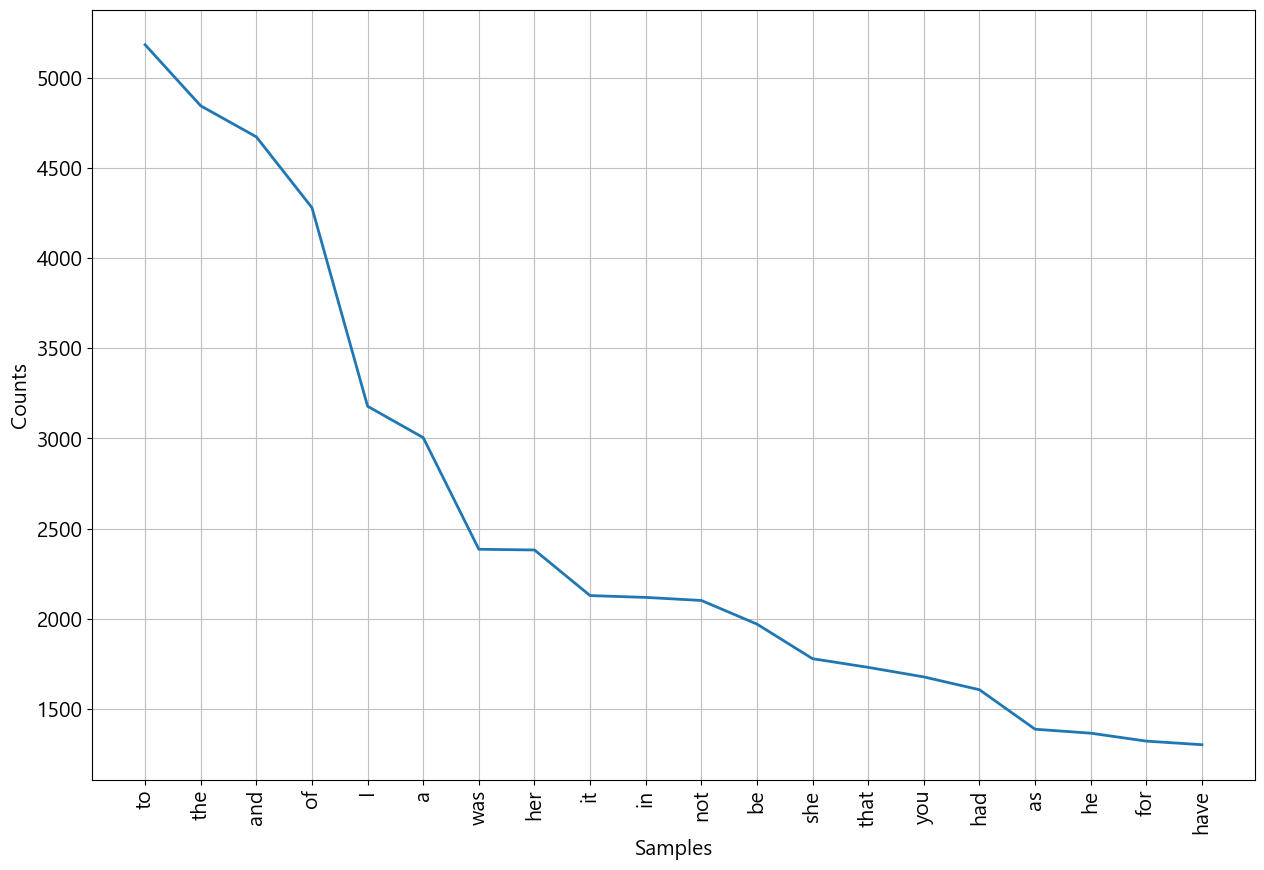

In [60]:
#각 단어의 사용 빈도를 그래프로 출력
from nltk import Text
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

# \소문자w : 특수문자제거
retokenize = RegexpTokenizer("[\w]+") #특수문자 제거

#retokenize.tokenize(emma_raw[50:100])

text = Text(retokenize.tokenize(emma_raw))
plt.rcParams["figure.figsize"]=(15,10)
plt.rcParams["font.size"]=15
text.plot(20) #상위 20개의 단어 출력
plt.show()

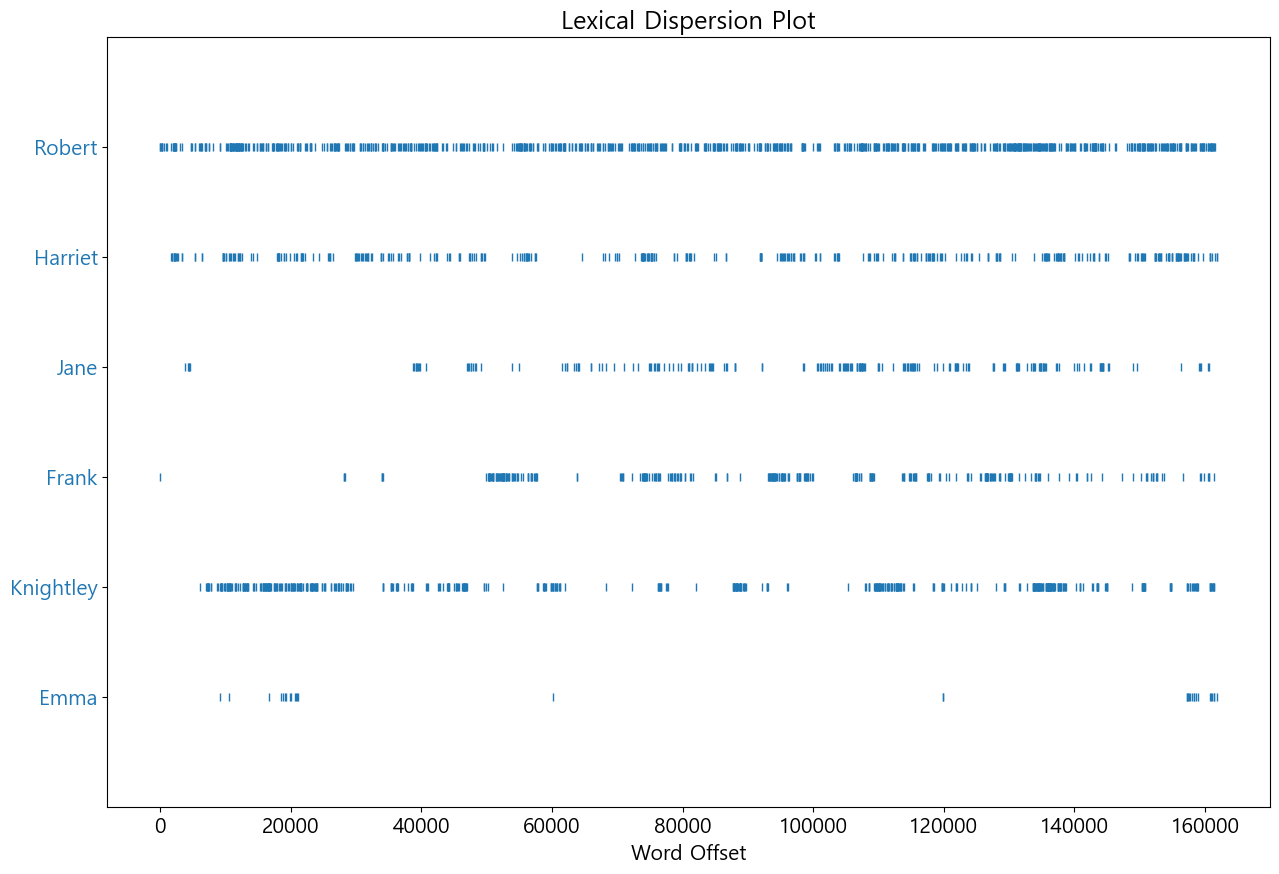

In [61]:
#단어가 사용된 위치를 시각화
#소설 엠마의 각 등장인물에 대해 적용

text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [62]:
#단어가 사용된 위치를 표시
#해당 단어의 앞뒤에 사용된 단어

text.concordance("Emma")

Displaying 25 of 865 matches:
 Emma by Jane Austen 1816 VOLUME I CHAPTER
 Jane Austen 1816 VOLUME I CHAPTER I Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could see faults in Emma Woodhouse and th

In [63]:
#같은 문맥에서 주어진 단어 대신 사용된 횟수가 높은 단어들
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [ ]:
#두 단어가 공통적으로 들어갈 수 있는 문맥 확인
text.common_contexts(['Emma','she'])

# 밑줄 부분에 Emma와 she가 들어갈 경우 같은 의미가 됨

In [64]:
from nltk import FreqDist
from nltk.tag import pos_tag

stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))

# NNP(고유대명사)이면서 필요없는 단어(stop words)는 제거
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]

#FreqDist : 문서에 사용된 단어(토큰)의 사용빈도 정보를 담는 클래스
#Emma 말뭉치에서 사람의 이름만 모아서 FreqDist 클래스 객체 생성
fd_names = FreqDist(names_list)

#전체 단어의 수, "Emma"라는 단어의 출현 횟수, 확률
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

#most_common 메서드를 사용하면 가장 출현 횟수가 높은 단어를 찾는다.
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

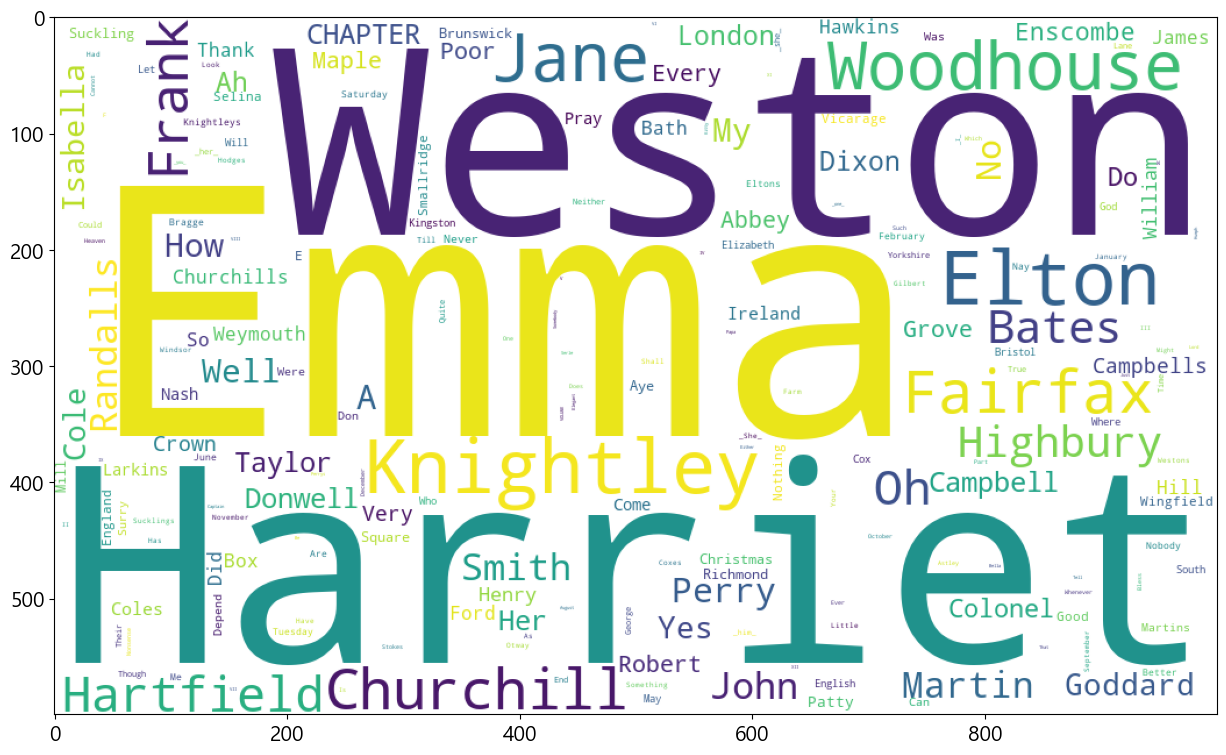

In [65]:
from wordcloud import WordCloud

wc = WordCloud(width=1000, height=600, background_color="white", random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_names))
plt.show()

# 3. 단어 빈도 분석

In [67]:
#단어빈도분석 : 전체 문서 또는 문서별 단어의 출현 빈도
f = open('./data/text/warandpeace.txt',encoding='utf-8')

lines = f.readlines()
f.close()

print(lines[1][:500])

The Project Gutenberg eBook of War and Peace, by Leo Tolstoy



In [69]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#숫자,특수문자 제거
tokenizer = RegexpTokenizer('[\w]+')

#불용어 사전
stop_words = stopwords.words('english')

#모든 단어를 소문자로 변환
words=''

for line in lines:
    words +=  line.lower()

#print(words)
#단어 단위로 토큰화
tokens = tokenizer.tokenize(words)

#불용어 제거
tokens2 = [i for i in list(tokens) if not i in stop_words]

#글자수 1인 단어들 제거
tokens3= [i for i in tokens2 if len(i)>1]

In [70]:
import pandas as pd

#출현 빈도가 높은 단어들
pd.Series(tokens3).value_counts().head(10)

said       2842
one        2134
pierre     1963
prince     1929
would      1366
natásha    1213
man        1189
andrew     1144
could      1116
time        929
Name: count, dtype: int64

Counter({'said': 2842, 'one': 2134, 'pierre': 1963, 'prince': 1929, 'would': 1366, 'natásha': 1213, 'man': 1189, 'andrew': 1144, 'could': 1116, 'time': 929, 'princess': 916, 'face': 893, 'french': 881, 'went': 862, 'know': 847, 'old': 835, 'eyes': 827, 'men': 792, 'rostóv': 776, 'room': 771, 'thought': 767, 'go': 755, 'like': 751, 'well': 746, 'see': 734, 'chapter': 732, 'count': 726, 'moscow': 722, 'began': 718, 'come': 684, 'came': 683, 'still': 676, 'without': 675, 'asked': 668, 'mary': 668, 'army': 665, 'looked': 651, 'say': 640, 'first': 633, 'nicholas': 633, 'emperor': 631, 'felt': 631, 'another': 620, 'life': 618, 'away': 617, 'left': 611, 'something': 601, 'two': 595, 'seemed': 583, 'napoleon': 578, 'head': 568, 'day': 567, 'yes': 561, 'people': 560, 'little': 557, 'long': 545, 'hand': 541, 'whole': 532, 'kutúzov': 529, 'back': 520, 'even': 512, 'general': 506, 'heard': 498, 'good': 497, 'way': 494, 'countess': 488, 'must': 482, 'look': 475, 'nothing': 473, 'always': 464, 'saw'

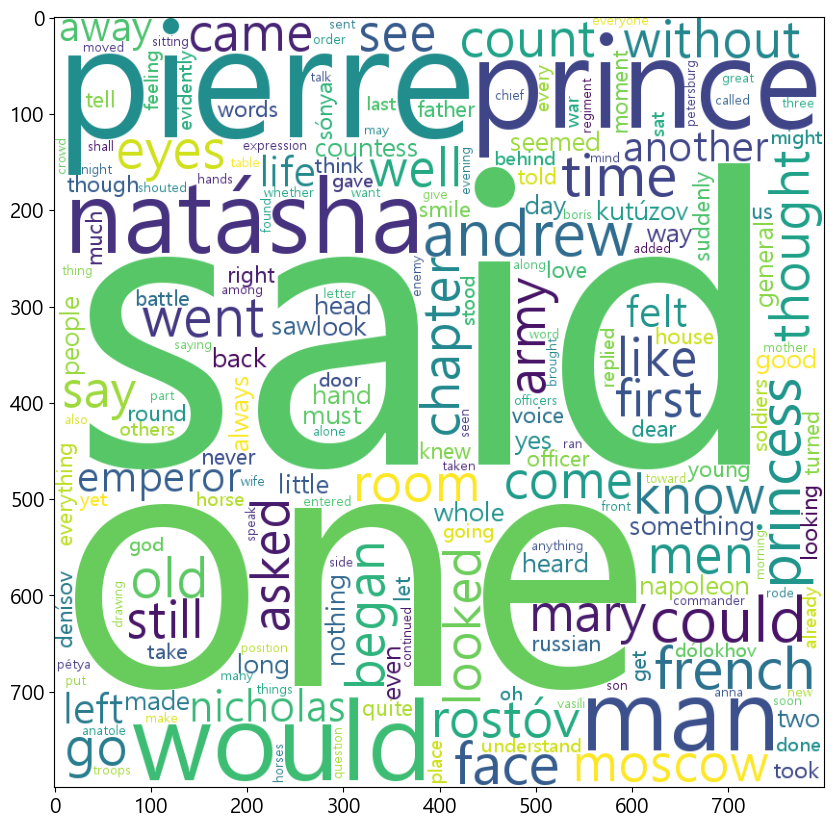

In [71]:
#워드 클라우드
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

#폰트 경로, 워드클라우드의 가로,세로 사이즈
wordcloud = WordCloud(
    font_path = 'c:/windows/fonts/malgun.ttf',
    width = 800,
    height = 800,
    background_color="white"
)

#단어별 출현횟수 저장
count = Counter(tokens3)

print(count)

wordcloud = wordcloud.generate_from_frequencies(count)
plt.imshow(wordcloud)
plt.show()

In [74]:
#뉴스 기사를 하나 찾아서 news1.txt로 저장
f = open("./data/text/news1.txt", encoding='utf8')
lines = f.readlines()
f.close()

In [75]:
#한나눔 형태소 분석기
from konlpy.tag import Hannanum

han = Hannanum()
temp = []

for i in range(len(lines)):
    #명사만 추출
    a=lines[i].strip() # 좌우 공백 제거
    temp.append(han.nouns(a))

In [76]:
# 2차원 리스트를 1차원 리스트로 변환하는 함수
def flatten(items):
    flatList = []
    for elem in items:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list=flatten(temp)

# 두글자 이상인 단어만 추출
word_list=pd.Series([x for x in word_list if len(x)>1])

#단어별 출현 빈도
word_list.value_counts().head(10)

유동성       13
지원         9
발생         6
개편         6
대출         5
범위         5
적격담보       5
예금취급기관     4
뱅크런        4
은행         4
Name: count, dtype: int64

In [77]:
#불용어 처리

stopwords=['전날','오전']
word_list2=[i for i in word_list if i not in stopwords]

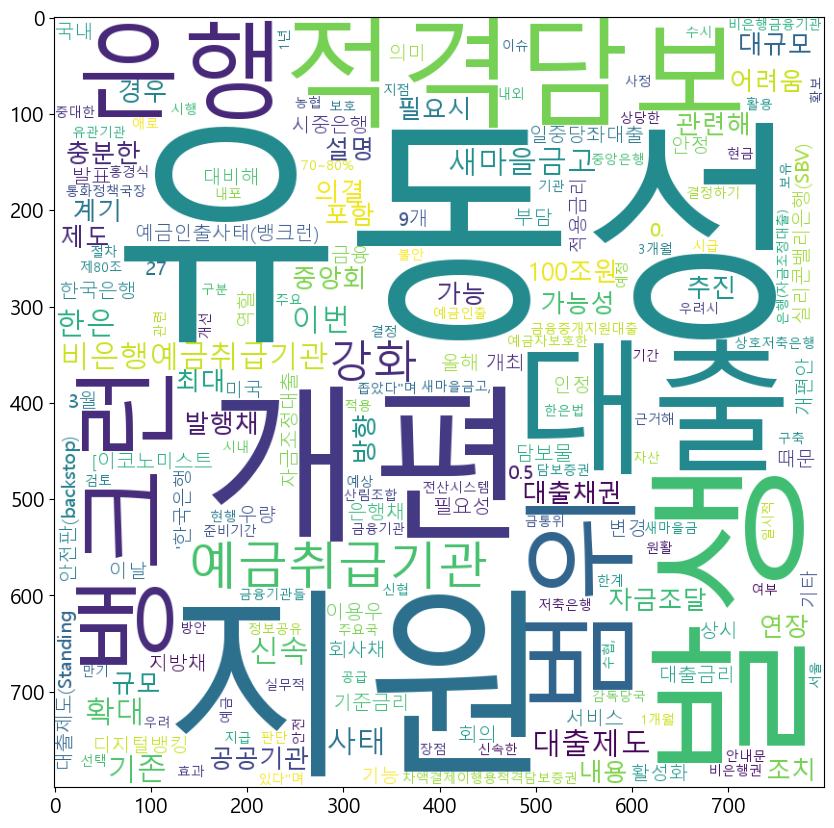

In [78]:
# 한글 뉴스를 워드클라우드로 출력
from collections import Counter
from wordcloud import WordCloud

wordcloud=WordCloud( font_path='c:/windows/fonts/malgun.ttf', width=800,height=800,background_color='white')

import matplotlib.pyplot as plt

count=Counter(word_list2)
wordcloud=wordcloud.generate_from_frequencies(count)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.show()

# 4. 텍스트 전처리

## 1) 정수인코딩

In [1]:
#텍스트를 숫자로 바꾸는 기법
text = '''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다.
특히 제주와 남해안에서 비바람이 강합니다.
'''

In [2]:
from nltk.tokenize import sent_tokenize

# 문장 토큰화
text = sent_tokenize(text)

print(text)

['모처럼 전국에 비가 내리고 있습니다.', '대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.', '비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다.', '특히 제주와 남해안에서 비바람이 강합니다.']


In [3]:
#명사만 추출하는 방법
from konlpy.tag import Okt

okt=Okt()
text2=[]

for txt in text:
    t=okt.nouns(txt)
    text2.append(t)

text2    

[['모처럼', '전국', '비'],
 ['대부분', '밤', '계속', '때문', '종일', '우산'],
 ['비', '양도', '바람', '불기', '때문', '우산', '우산', '게', '더'],
 ['제주', '남해안', '비바람']]

In [4]:
# 명사와 형용사를 추출하는 방법
from konlpy.tag import Okt

okt=Okt()
text2 = []

for txt in text:
    morph = okt.pos(txt)
    text2.append(morph)

text3 = []

for text in text2:
    line=[]
    for word, tag in text:
         if tag in ['Noun','Adjective']:
            line.append(word)
    text3.append(line)

print(text3)    

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '우산', '게', '더', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [5]:
vocab = {}
sentences = []
stop_words = ['더', '게']

for txt in text3:
    result = []
    for word in txt:

        # 불용어 제거
        if word not in stop_words: #불용어가 아니면
            result.append(word)
            if word not in vocab: #새로운 단어이면
                vocab[word] = 0 # 출현횟수 0으로
            vocab[word] += 1 #출현횟수 증가
    sentences.append(result)
print(sentences)

[['모처럼', '전국', '비', '있습니다'], ['대부분', '밤', '계속', '때문', '종일', '우산', '필요하겠는데요'], ['비', '양도', '많고', '바람', '강하게', '불기', '때문', '작은', '우산', '우산', '좋습니다'], ['제주', '남해안', '비바람', '강합니다']]


In [6]:
#단어:출현빈도

print(vocab)

{'모처럼': 1, '전국': 1, '비': 2, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '때문': 2, '종일': 1, '우산': 3, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1}


In [7]:
print(vocab["우산"]) # 단어의 빈도수 출력

3


In [8]:
#단어에 일련번호 부여
word_to_index = {}
i=0

for word in vocab :
    if vocab[word] > 1 : # 빈도수가 1보다 큰 단어들만 추가
        i=i+1
        word_to_index[word] = i #단어에 번호를 매김

print(word_to_index)

{'비': 1, '때문': 2, '우산': 3}


In [9]:
#Out-Of-Vocabulary 단어 집합에 없는 단어
#출현빈도수가 낮은 단어들은 word_to_index에 없으므로
# word_to_index에 OOV라는 단어를 추가하고 단어 집합에 없는 단어들은 OOV로 처리

word_to_index['OOV'] = len(word_to_index) + 1
encoded = []

for s in sentences: #문장들을 반복
    temp = []

    for w in s: #문장의 단어들을 반복
        try:
            #단어의 고유번호를 리스트에 추가
            temp.append(word_to_index[w])
        except:
            #존재하지 않는 단어는 OOV의 인덱스를 추가
            temp.append(word_to_index['OOV'])
    encoded.append(temp)

print(encoded)

[[4, 4, 1, 4], [4, 4, 4, 2, 4, 3, 4], [1, 4, 4, 4, 4, 4, 2, 4, 3, 3, 4], [4, 4, 4, 4]]


In [10]:
import numpy as np

#2차원 데이터를 1차원으로 바꾸고
words = np.hstack(sentences)
print(words)

['모처럼' '전국' '비' '있습니다' '대부분' '밤' '계속' '때문' '종일' '우산' '필요하겠는데요' '비' '양도'
 '많고' '바람' '강하게' '불기' '때문' '작은' '우산' '우산' '좋습니다' '제주' '남해안' '비바람' '강합니다']


In [11]:
from collections import Counter
vocab = Counter(words) # 단어의 출현빈도를 쉽게 계산하는 클래스
print(vocab)

Counter({'우산': 3, '비': 2, '때문': 2, '모처럼': 1, '전국': 1, '있습니다': 1, '대부분': 1, '밤': 1, '계속': 1, '종일': 1, '필요하겠는데요': 1, '양도': 1, '많고': 1, '바람': 1, '강하게': 1, '불기': 1, '작은': 1, '좋습니다': 1, '제주': 1, '남해안': 1, '비바람': 1, '강합니다': 1})


In [12]:
print(vocab["우산"]) # 단어의 빈도수

3


In [13]:
vocab_size = 5

# 출현빈도가 높은 상위 5개의 단어
vocab = vocab.most_common(vocab_size)
vocab

[('우산', 3), ('비', 2), ('때문', 2), ('모처럼', 1), ('전국', 1)]

In [14]:
word_to_index = {}
i = 0

for (word, frequency) in vocab :
    i = i+1
    word_to_index[word] = i

print(word_to_index)

{'우산': 1, '비': 2, '때문': 3, '모처럼': 4, '전국': 5}


In [ ]:
# 단어의 출현빈도
# 문서1 문서2 문서3 문서4 ....

# tf 단어가 얼마나 출현하는가
# df 문서의 출현 빈도 (문서마다 나타나는 말은 의미 없음)

## 2) 원핫인코딩

In [16]:
#정수인코딩의 단점: 단어의 순서가 없음
#원핫인코딩 : 단어의 순서에 맞게 배열
from konlpy.tag import Okt  

okt=Okt()  

#토근화(형태소 분석)
token=okt.morphs("나는 학교에 간다 나는 집에 간다")  
print(token)

['나', '는', '학교', '에', '간다', '나', '는', '집', '에', '간다']


In [17]:
#중복된 단어는 제외하고 단어를 key로 고유한 숫자 인덱스 부여
word2index={}

for idx,voca in enumerate(token):
    if voca not in word2index.keys():
        word2index[voca]=len(word2index)

print(word2index)

{'나': 0, '는': 1, '학교': 2, '에': 3, '간다': 4, '집': 5}


In [18]:
#원핫인코딩 함수
def one_hot_encoding(word, word2index):
    #전체 단어 갯수만큼 0으로 채운 리스트
    one_hot_vector = [0]*(len(word2index))
    #해당하는 단어의 인덱스를 찾아서
    index=word2index[word]
    #1로 설정(나머지는 0)
    one_hot_vector[index]=1
    return one_hot_vector

key_list=word2index.keys()
print(key_list)

for key in key_list:
    print(key, one_hot_encoding(key,word2index))

dict_keys(['나', '는', '학교', '에', '간다', '집'])
나 [1, 0, 0, 0, 0, 0]
는 [0, 1, 0, 0, 0, 0]
학교 [0, 0, 1, 0, 0, 0]
에 [0, 0, 0, 1, 0, 0]
간다 [0, 0, 0, 0, 1, 0]
집 [0, 0, 0, 0, 0, 1]


In [19]:
#케라스에서 지원하는 원핫인코딩 함수
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text="나는 학교에 간다 나는 집에 간다"

t = Tokenizer()

# 각 단어에 대한 정수 인코딩
t.fit_on_texts([text])
print(t.word_index)

#각 단어에 매핑된 숫자로 변환된 리스트
sub_text="나는 집에 간다"
encoded=t.texts_to_sequences([sub_text])[0]
print(encoded)

#원핫인코딩
one_hot = to_categorical(encoded)
print(one_hot)

{'나는': 1, '간다': 2, '학교에': 3, '집에': 4}
[1, 4, 2]
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]


In [20]:
#원핫인코딩의 단점:
# 단어 갯수가 많아지면 변수의 갯수가 많아지게 됨
# 메모리 활용의 비효율성: 변수가 100개 있다면 99개의 0과 1개의 0으로 구성됨
# 비슷한 단어들의 유사성을 표현하기 어려움
#   강아지 [0,1,1]와 개 [1,0,0] 이라면 비슷한 단어이지만 유사성을 찾기 어려움
# 유사성을 찾기 위한 방법으로 LSA, RNN, Word2Vec 등의 방법이 있음



## 3) BOW(Bag Of Words)

In [21]:
# Bag of Words(BoW) : 단어의 등장 순서를 고려하지 않는 빈도수 기반의 텍스트 데이터의 수치화 방법
# 가방에 단어들을 넣으면 순서가 중요하지 않음
# 각 단어에 고유한 인덱스를 부여하고
# 각 인덱스의 위치에 단어의 출현 횟수를 저장

from konlpy.tag import Okt
import re  

okt=Okt()  
token=re.sub("[.!#~]","",
             '비가 오니 마음이 차분해지네요. 요즘 너무 더웠어요. 비가 오니 마음이 기쁘네요.')

#형태소 분석
token=okt.morphs(token)  
word2index={}  #단어 사전(단어와 숫자 인덱스)
bow=[]  #단어 가방(단어와 출현 횟수)

for voca in token:  
    #사전에 없는 단어 추가
    if voca not in word2index.keys():  
        word2index[voca]=len(word2index)  
        #단어의 인덱스와 출현횟수(기본값:1)
        bow.insert(len(word2index)-1,1)
    else:
        #재등장하는 단어의 인덱스
        index=word2index.get(voca)
        #단어 카운트 증가
        bow[index]=bow[index]+1

print(word2index)  

{'비': 0, '가': 1, '오니': 2, '마음': 3, '이': 4, '차분해지네요': 5, '요즘': 6, '너무': 7, '더웠어요': 8, '기쁘네요': 9}


In [22]:
#단어의 출현 횟수
print(bow)

[2, 2, 2, 2, 2, 1, 1, 1, 1, 1]


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
corpus=['모처럼 전국에 비가 내리고 있습니다.']
line=['전국에 비가']

vector = CountVectorizer()
vector.fit(corpus)

print(vector.vocabulary_) # 단어사전
print(vector.transform(line).toarray()) #단어가 출현한 위치에 1 표시 (단어 출현 빈도)

{'모처럼': 1, '전국에': 4, '비가': 2, '내리고': 0, '있습니다': 3}
[[0 0 1 0 1]]


In [24]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['''모처럼 전국에 비가 내리고 있습니다.
대부분 밤까지 계속되기 때문에 종일 우산이 필요하겠는데요.
비의 양도 많고 바람도 강하게 불기 때문에 작은 우산 말고 큰 우산 챙기는 게 더 좋습니다. ''']

#문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 BOW 인코딩한 벡터를 만드는 클래스
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산
#단어들의 출현 횟수
print(vector.fit_transform(corpus).toarray())  

# 만들어진 단어와 인덱스
print(vector.vocabulary_)

[[1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]]
{'모처럼': 7, '전국에': 18, '비가': 11, '내리고': 2, '있습니다': 16, '대부분': 3, '밤까지': 9, '계속되기': 1, '때문에': 4, '종일': 19, '우산이': 15, '필요하겠는데요': 22, '비의': 12, '양도': 13, '많고': 5, '바람도': 8, '강하게': 0, '불기': 10, '작은': 17, '우산': 14, '말고': 6, '챙기는': 21, '좋습니다': 20}


In [26]:
f=open('./data/text/news1.txt', encoding='utf8')

corpus=f.read()

txt=okt.nouns(corpus)
txt2=[' '.join(txt)]
txt2

['이코노미스트 이용우 기자 한국은행 은행 대출 제도 개편 금융 안정 기능 대규모 예금 사태 뱅크런 등 비 은행 예금 취급 기관 자금 조달 어려움 발생 규모 유동성 신속 지원 제도 변경 사태 계기 유동성 지원 제도 은 이 내용 한국은행 대출 제도 개편 방향 발표 은 이번 개편 계기 관련 올해 발생 미국 실리콘밸리 은행 뱅크런 사태 때문 디지털 뱅킹 서비스 활성화 국내 뱅크런 사태 가능성 대비 필요성 의미 이 은 날 개최 회의 예금 취급 기관 유동성 안전판 역할 방향 대출 제도 개편안 의결 우선 은 은행 대한 상시 대출 제도 인 자금 조정 대출 적용 금리 기존 대출 금리 기준금리 를 앞 이보 만 더하기 해 은행 부담 적 격담 보 범위 확대 은 시중 은행 대출 시 인정 담보 물이 기존 적 격담 보 개 공공기관 발행 채 은행 채 및 지방채 기타 공공기관 발행 채 우량 회사채 포함 확대 적 격담 보 중 당좌 대출 차액 결제 이행 용적 격담 보증 및 금융 개지 대출 포함 이 금융기관 현금 확보 때 좀 더 은 유동성 지급 효과 것 기대 대출 만기 기존 최대 개월 범위 내 연장 가능 최대 개월 범위 내 연장 가능 은 향후 대출 적 격담 보 예금 취급 기관 대출 채권 추가 방안 추진 위 법적 실무 주요 이슈 관련 유관 기관 검토 관련 제도 개선 전산 시스템 구축 등 위 준비 기간 이 기간 약 내외 예상 은 절차 금통위 의결 후 시행 예정 은 이 대해 예금 취급 기관 자산 를 대출 채권 보유 며 필요시 활용 경우 중앙은행 유동성 적기 공급 수 장점 고 설명 뱅크런 발생 우려 시 새마을금고 등 유동성 신속 지원 서울 시내 새마을금고 지점 예금 보호 내용 사진 새마을금고 은 새마을금고 저축은행 등 비 은행 금융기관 대한 유동성 지원 제도 개편 은 통해 필요시 약 규모 유동성 비 은행권 지원 수 것 판단 은 우선 상호 저축은행 신협 농협 수협 산림조합 새마을금고 등 비 은행 예금 취급 기관 자금 조달 애로 발생 발생 가능성 경우 은법 제 근거 이 기관 중앙회 유동성 지원 여부 최대

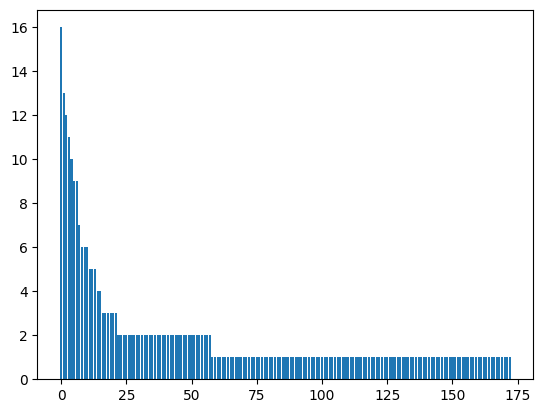

[('대출', 16), ('유동성', 13), ('은행', 12), ('예금', 11), ('제도', 10), ('기관', 9), ('지원', 9), ('취급', 7), ('격담', 6), ('발생', 6), ('개편', 6), ('새마을금고', 5), ('범위', 5), ('뱅크런', 5), ('사태', 4), ('자금', 4), ('확대', 3), ('신속', 3), ('이번', 3), ('기존', 3), ('금융기관', 3), ('관련', 3), ('조정', 2), ('조치', 2), ('대한', 2), ('대규모', 2), ('가능', 2), ('적용', 2), ('발행', 2), ('방향', 2), ('저축은행', 2), ('보호', 2), ('설명', 2), ('의결', 2), ('우선', 2), ('우려', 2), ('어려움', 2), ('연장', 2), ('조달', 2), ('담보', 2), ('중앙회', 2), ('규모', 2), ('필요시', 2), ('결정', 2), ('금리', 2), ('금융', 2), ('개월', 2), ('한국은행', 2), ('공공기관', 2), ('내용', 2), ('기간', 2), ('계기', 2), ('경우', 2), ('최대', 2), ('채권', 2), ('가능성', 2), ('추진', 2), ('포함', 2), ('현금', 1), ('이보', 1), ('향후', 1), ('이슈', 1), ('의미', 1), ('차액', 1), ('현행', 1), ('은법', 1), ('이용우', 1), ('확보', 1), ('유관', 1), ('위해', 1), ('활성화', 1), ('활용', 1), ('우량', 1), ('회사채', 1), ('용적', 1), ('올해', 1), ('은행권', 1), ('한도', 1), ('장점', 1), ('이행', 1), ('지점', 1), ('지방채', 1), ('최대한', 1), ('지급', 1), ('추가', 1), ('증권', 1), ('중앙은행', 1), ('준비', 1), 

In [27]:
import numpy as np
import matplotlib.pyplot as plt

vect = CountVectorizer().fit(txt2)

#bow의 출현횟수 합계
cnt = vect.transform(txt2).toarray().sum(axis=0)
idx = np.argsort(-cnt) #카운트 내림차순 정렬
cnt = cnt[idx]

# x축의 단어이름
feature_name = np.array(vect.get_feature_names_out())[idx]

plt.bar(range(len(cnt)), cnt)
plt.show()
print(list(zip(feature_name,cnt)))

In [28]:
#불용어 추가
vector = CountVectorizer(stop_words=['더'])

print(vector.fit_transform(txt2).toarray())
print(vector.vocabulary_)



[[ 2  2  1  1  1  2  1  1  6  1  1  6  2  1  1  2  2  2  1  1  3  1  1  1
   1  2  1  2  2  3  1  2  9  1  1  1  3  1  1  1  2  1  1  2  1  1  2  1
  16  2  1  1  1  1  1  1  1  1  6  1  2  1  2  5  1  5  1  1  1  1  2  1
   1  1  1  4  1  1  1  5  1  1  1  2  1  1  1  1  1  1  3  1  1  1  1  1
   1  2  1  1  2 11  1  1  1  1  1  2  2  1  1 13  1 12  1  2  1  3  1  1
   1  1  1  1  1  4  1  1  2  1  2  1  1  1 10  2  2  2  1  1  1  2  1  1
   1  9  1  1  2  2  1  1  2  7  1  1  1  2  1  2  1  2  1  1  1  1  3  1
   1  1  1  1  1]]
{'이코노미스트': 121, '이용우': 120, '기자': 35, '한국은행': 161, '은행': 113, '대출': 48, '제도': 134, '개편': 8, '금융': 28, '안정': 95, '기능': 33, '대규모': 46, '예금': 101, '사태': 75, '뱅크런': 63, '취급': 153, '기관': 32, '자금': 125, '조달': 135, '어려움': 97, '발생': 58, '규모': 25, '유동성': 111, '신속': 90, '지원': 145, '변경': 67, '계기': 16, '내용': 40, '방향': 62, '발표': 59, '이번': 117, '관련': 20, '올해': 104, '미국': 57, '실리콘밸리': 92, '때문': 53, '디지털': 52, '뱅킹': 64, '서비스': 80, '활성화': 168, '국내': 23, '가능성': 1, '대비': 47, '필

## 4) TF-IDF


In [31]:
# tf : 문서 안에서 자주 출현하는 것은 중요도가 높을 가능성이 큼
# df : 문서마다 출현하는 것은 의미가 없을 가능성이 큼

In [32]:
docs = [
  'python 데이터 python 프로그래밍',
  '데이터 분석',
  '빅 데이터 분석',
  '데이터 전처리 텍스트 전처리'
]

vocab=list() #단어사전 리스트

for doc in docs: #문서
    for w in doc.split(): #단어
        vocab.append(w) #단어 추가

vocab=list(set(vocab)) #중복 단어를 제거한 리스트
vocab.sort() #오름차순 정렬
vocab

['python', '데이터', '분석', '빅', '전처리', '텍스트', '프로그래밍']

In [33]:
from math import log

N = len(docs) # 총 문서의 수

# tf(Term Frequency) : 단어의 빈도
# 특정 문서 d에서 특정 단어 t의 출현빈도
def tf(t, d):
    return d.count(t)

# df(Document Frequency) : 특정 단어가 등장한 문서의 수, 모든 문서에 자주 나오는 단어는 중요한 단어가 아닐 수 있음
#   논문에서 abstract, 서론, 본론, 결론, 참고문헌 항상 나오는 단어들 - 중요한 의미가 없음
# idf(Inverse Document Frequency) : df의 반비례하는 수
#   log( n / (1+df(t)))
#   희귀 단어의 경우 분모가 매우 작아지게 되어 idf 값이 너무 커지게 되므로 로그를 취함
#   한번도 등장하지 않는 단어라면 분모가 0이 되므로 1을 더하게 됨

# 단어가 몇개의 문서에 출현하는가
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc
    return log(N/(df + 1))

#tf와 idf를 곱한 값
def tfidf(t, d):
    return tf(t,d)* idf(t)

In [34]:
import pandas as pd
result = []

for i in range(N): #문서 반복
    result.append([])
    d = docs[i]

    for j in range(len(vocab)): #단어 반복
        t = vocab[j]
        #1차원 배열의 끝에 추가
        result[-1].append(tf(t, d))

print(result)       

[[2, 1, 0, 0, 0, 0, 1], [0, 1, 1, 0, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0], [0, 1, 0, 0, 2, 1, 0]]


In [35]:
df_tf = pd.DataFrame(result, columns = vocab)
df_tf

,python,데이터,분석,빅,전처리,텍스트,프로그래밍
0,2,1,0,0,0,0,1
1,0,1,1,0,0,0,0
2,0,1,1,1,0,0,0
3,0,1,0,0,2,1,0


In [36]:
#각 단어의 idf 계산
result = []

for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

df_idf = pd.DataFrame(result, index = vocab, columns = ["IDF"])
df_idf

,IDF
python,0.693147
데이터,-0.223144
분석,0.287682
빅,0.693147
전처리,0.693147
텍스트,0.693147
프로그래밍,0.693147


In [37]:
#모든 단어들의 tfidf 계산 - tfidf가 크면 중요도가 높고, 작으면 중요도가 낮음
result = []

for i in range(N):
    result.append([])
    d = docs[i]

    for j in range(len(vocab)):
        t = vocab[j]
        result[-1].append(tfidf(t,d))

df_tfidf = pd.DataFrame(result, columns = vocab)
df_tfidf

,python,데이터,분석,빅,전처리,텍스트,프로그래밍
0,1.386294,-0.223144,0.000000,0.000000,0.000000,0.000000,0.693147
1,0.000000,-0.223144,0.287682,0.000000,0.000000,0.000000,0.000000
2,0.000000,-0.223144,0.287682,0.693147,0.000000,0.000000,0.000000
3,0.000000,-0.223144,0.000000,0.000000,1.386294,0.693147,0.000000


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

#DTM(Document Term Matrix, 문서 단어 행렬)
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산
print(vector.fit_transform(corpus).toarray())
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(corpus)

print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

#사이킷런의 TF-IDF 계산 방식이 약간 달라서 차이가 나지만 일반적으로 많이 사용하는 함수
#  tf-idf에 L2 정규화를 적용하여 값을 조정함

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


## 5) 코사인 유사도

In [40]:
#유클리드 거리
import numpy as np

def dist(x,y):  
    return np.sqrt(np.sum((x-y)**2))

doc0 = np.array((1,1,0,1))
doc1 = np.array((2,3,0,1))
doc2 = np.array((1,2,3,1))

print(dist(doc0,doc1)) #doc0과 doc1의 거리
print(dist(doc0,doc2))

2.23606797749979
3.1622776601683795


In [42]:
#자카드 유사도: 두 문서의 총 단어 집합에서 공통적으로 출현한 단어의 비율
doc1 = "python 파이썬 데이터"
doc2 = "빅데이터 python 파이썬"

# 토큰화
tokenized_doc1 = doc1.split()
tokenized_doc2 = doc2.split()

print(tokenized_doc1)
print(tokenized_doc2)

['python', '파이썬', '데이터']
['빅데이터', 'python', '파이썬']


In [43]:
#합집합
union = set(tokenized_doc1).union(set(tokenized_doc2))
print(union)

{'빅데이터', '데이터', '파이썬', 'python'}


In [44]:
#교집합
intersection = set(tokenized_doc1).intersection(set(tokenized_doc2))
print(intersection)

{'파이썬', 'python'}


In [45]:
print(len(intersection)/len(union))

0.5


In [46]:
# Cosine Similarity
# 두 벡터 간의 코사인 각도를 이용하여 구하는 두 벡터의 유사도
# 두 벡터의 방향이 완전히 같으면 1, 90도이면 0, 반대 방향이면 -1
# 1에 가까울수록 유사도가 높다고 판단함
from numpy import dot

a=[0,1,1]
b=[1,0,2]

# 배열의 곱( 0x1 + 1x0 + 1x2)
dot(a,b)

2

In [47]:
from math import sqrt
from numpy.linalg import norm

a=[0,1,1]
b=[1,0,2]

print(norm(a)) #a의 제곱합의 제곱근
print(sqrt(2))
print(norm(b))
print(sqrt(5))
print(norm(a)*norm(b))

1.4142135623730951
1.4142135623730951
2.23606797749979
2.23606797749979
3.1622776601683795


In [48]:
#a,b의 코사인 유사도
print( dot(a,b) / (norm(a)*norm(b)))

0.6324555320336759


In [49]:
def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

In [50]:
import numpy as np

doc1=np.array([0,1,1,1])
doc2=np.array([1,0,1,1])
doc3=np.array([2,0,2,3])
doc4=np.array([0,2,2,2])

print(cos_sim(doc1, doc2)) #문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3)) #문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) #문서2과 문서3의 코사인 유사도
print(cos_sim(doc1, doc4)) #문서1과 문서4의 코사인 유사도

#코사인 유사도는 단순한 빈도수보다도 두 벡터의 방향이 완전히 동일한 경우에는 1(유사도가 최대)

0.6666666666666667
0.7001400420140049
0.9801960588196069
1.0000000000000002


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
 '매우 좋은 영화네요 매우 추천해요',
 '매우 볼만한 영화네요.',
 '조금 볼만한 영화네요 조금 추천해요',
 '별로 볼 내용이 없는 것 같아요 추천하지 않아요',
]

#DTM(Document Term Matrix, 문서 단어 행렬)
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수 계산
print(vector.fit_transform(corpus).toarray()) # 출현빈도
print(vector.vocabulary_) # 단어사전

[[0 0 2 0 0 0 0 1 0 1 0 1]
 [0 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 1 2 0 0 1]
 [1 1 0 1 0 1 1 0 0 0 1 0]]
{'매우': 2, '좋은': 9, '영화네요': 7, '추천해요': 11, '볼만한': 4, '조금': 8, '별로': 3, '내용이': 1, '없는': 6, '같아요': 0, '추천하지': 10, '않아요': 5}


In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer  

tfidfv = TfidfVectorizer().fit(corpus)  
tfidf_matrix = tfidfv.fit_transform(corpus)  

print(tfidfv)  
print(tfidfv.transform(corpus).toarray())  
print(tfidfv.vocabulary_)

TfidfVectorizer()
[[0.         0.         0.74205499 0.         0.         0.
  0.         0.30037873 0.         0.47060133 0.         0.37102749]
 [0.         0.         0.61366674 0.         0.61366674 0.
  0.         0.49681612 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.33166972 0.
  0.         0.26851522 0.84136197 0.         0.         0.33166972]
 [0.40824829 0.40824829 0.         0.40824829 0.         0.40824829
  0.40824829 0.         0.         0.         0.40824829 0.        ]]
{'매우': 2, '좋은': 9, '영화네요': 7, '추천해요': 11, '볼만한': 4, '조금': 8, '별로': 3, '내용이': 1, '없는': 6, '같아요': 0, '추천하지': 10, '않아요': 5}


In [53]:
from sklearn.metrics.pairwise import linear_kernel  

# 각 4개의 문서끼리 코사인유사도
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)  
cosine_sim

array([[1.        , 0.60460746, 0.20371485, 0.        ],
       [0.60460746, 1.        , 0.33693737, 0.        ],
       [0.20371485, 0.33693737, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [55]:
#줄거리가 유사한 영화 추천
import pandas as pd

#https://www.kaggle.com/rounakbanik/the-movies-dataset
df = pd.read_csv('./data/movies/movies_metadata.csv',low_memory=False)
df.head()

# 일부 컬럼에 자료형이 혼합된 경우 메모리 사용량이 증가할 수 있으므로 low_memory=False 사용

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [56]:
df=df.head(10000) #1만개의 행으로 실습

# overview(줄거리) 필드의 결측값이 있는 행의 수
df['overview'].isnull().sum()

29

In [57]:
#결측값을 빈값으로 채움
df['overview'] = df['overview'].fillna('')
df['overview'].isnull().sum()

0

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
#                         불용어

# overview에 대해서 tf-idf 수행
tfidf_matrix = tfidf.fit_transform(df['overview'])
print(tfidf_matrix.shape) #단어 개수 32350

(10000, 32350)


In [59]:
for idx,value in enumerate(tfidf_matrix[0].toarray()[0]):  
    if value>0:
        print(idx, value)

902 0.15117478233143042
1454 0.42392042026514853
1981 0.16286909320527743
3295 0.1297104481680652
4007 0.11144337304471348
4375 0.5039312222568495
5502 0.13015717076993974
8160 0.13773181837307621
9069 0.13469257688044736
10050 0.10098899142189678
12957 0.13413569108104803
13182 0.10651606055561727
16657 0.10437460173367771
16682 0.11056336286192948
16946 0.185198454093184
17089 0.09235735150746406
17288 0.12032396861553211
20940 0.10463026623909469
21963 0.09735511488229845
22065 0.1370865241690154
24768 0.11977460922250864
25398 0.11771461367669954
25822 0.14053973231737085
29507 0.16526304049384546
31861 0.4463425051285872


In [60]:
from sklearn.metrics.pairwise import linear_kernel

#tfidf에서는 dot product를 구하면 코사인 유사도를 얻을 수 있음
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
linear_kernel([[1,2]],[[1,2]]) # 1x1 + 2x2

array([[5.]])

In [61]:
#영화 제목과 인덱스, drop_duplicates() 중복값 제거
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
print(indices.head())

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64


In [62]:
#영화제목을 입력하면 인덱스가 리턴됨
idx = indices['Toy Story']
idx

0

In [63]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # 영화의 제목으로 인덱스 조회
    idx = indices[title]
    # 해당 영화와의 유사도 계산
    sim_scores = list(enumerate(cosine_sim[idx]))
    # 유사도에 따라 정렬, key 정렬기준 필드(두번째값 기준 정렬), reverse 내림차순
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # 가장 유사한 10개의 영화 리스트
    sim_scores = sim_scores[1:11]
    print(sim_scores)
    # 리스트의 0번 인덱스
    movie_indices = [i[0] for i in sim_scores]
    # 가장 유사한 10개의 영화의 제목
    return df['title'].iloc[movie_indices]

#가장 유사한 영화 목록
get_recommendations('Toy Story')

[(2997, 0.4563847223997509), (8327, 0.2125051726227112), (1071, 0.18331721941453483), (3057, 0.14787027144517378), (1932, 0.14188013382197437), (485, 0.14122665831617187), (5797, 0.13658886827487585), (7254, 0.1301910487191963), (6944, 0.1262789816742374), (7615, 0.12460340953655337)]


2997                                    Toy Story 2
8327                                      The Champ
1071                          Rebel Without a Cause
3057                                Man on the Moon
1932                                      Condorman
485                                          Malice
5797                                  Class of 1984
7254                                 Africa Screams
6944                               Rivers and Tides
7615    The First $20 Million Is Always the Hardest
Name: title, dtype: object

## 6) 추천시스템(컨텐트 기반 필터링)

In [64]:
#컨텐트 기반 필터링(Content based filtering) :
#  사용자가 특정 아이템을 선호하는 경우 그 아이템과 비슷한 컨텐츠를 가진 다른 아이템을 추천하는 방식
import pandas as pd
df = pd.read_csv('./data/movies/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [65]:
# genres : 영화 장르
# keywords : 영화의 키워드
# original_language : 영화 언어
# title : 제목
# vote_average : 평점 평균
# vote_count : 평점 카운트
# popularity : 인기도
# overview : 줄거리
#필요한 필드만 선택

df = df[['id','genres', 'vote_average', 'vote_count','popularity','title',  
             'keywords', 'overview']]
df

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
0,19995,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",7.2,11800,150.437577,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di..."
1,285,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",6.9,4500,139.082615,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha..."
2,206647,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.3,4466,107.376788,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...
3,49026,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",7.6,9106,112.312950,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...
4,49529,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",6.1,2124,43.926995,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca..."
...,...,...,...,...,...,...,...,...
4798,9367,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",6.6,238,14.269792,El Mariachi,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi just wants to play his guitar and ...
4799,72766,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",5.9,5,0.642552,Newlyweds,[],A newlywed couple's honeymoon is upended by th...
4800,231617,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",7.0,6,1.444476,"Signed, Sealed, Delivered","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","""Signed, Sealed, Delivered"" introduces a dedic..."
4801,126186,[],5.7,7,0.857008,Shanghai Calling,[],When ambitious New York attorney Sam is sent t...


In [66]:
df[['genres', 'keywords']].head()

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


In [67]:
dict1 = "{'a': 3, 'b': 5}"
print(type(dict1)) #스트링

#print(dict1['a']) #스트링이므로 에러가 발생함
#print(dict1['b'])

<class 'str'>


In [68]:
dict2 = eval(dict1) #자료형을 스트링에서 딕셔너리로 변환

print(type(dict2))  
print(dict2['a'])
print(dict2['b'])

<class 'dict'>
3
5


In [69]:
#스트링을 딕셔너리 타입으로 변경
# eval('문자열') - 문자열 내에 포함된 파이썬 명령어를 실행하는 함수

df['genres'] = df['genres'].apply(eval)
df['keywords'] = df['keywords'].apply(eval)

#딕셔너리 내부의 하위 변수들을 합쳐서 문자열 변수 1개에 저장
df['genres'] = df['genres'].apply(
    lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))

df['keywords'] = df['keywords'].apply(
    lambda x : [d['name'] for d in x]).apply(lambda x : " ".join(x))

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

#장르에 대한 출현빈도 계산
c_vector_genres = count_vector.fit_transform(df['genres']).toarray()
c_vector_genres

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [71]:
from sklearn.metrics.pairwise import cosine_similarity

#코사인 유사도 계산
genre_c_sim = cosine_similarity(c_vector_genres, c_vector_genres).argsort()[:, ::-1]
cosine_similarity(c_vector_genres, c_vector_genres)[0][:30]

array([1.        , 0.77459667, 0.51639778, 0.2236068 , 0.89442719,
       0.77459667, 0.        , 0.89442719, 0.51639778, 0.77459667,
       1.        , 0.4472136 , 0.77459667, 0.51639778, 1.        ,
       0.51639778, 0.89442719, 0.77459667, 0.67082039, 0.77459667,
       0.77459667, 0.63245553, 0.63245553, 0.63245553, 0.51639778,
       0.        , 0.89442719, 0.8       , 0.8       , 0.51639778])

In [72]:
#영화 추천 함수
def get_recommend_movie_list(data, movie_title, top=5):
    # 특정 영화 검색
    target_movie_index = data[data['title'] == movie_title].index.values
    #코사인 유사도 상위 5행
    sim_index = genre_c_sim[target_movie_index, :top].reshape(-1)
    #아이디가 같은 self row 제외
    sim_index = sim_index[sim_index != target_movie_index]
    #data frame으로 만들고 vote_count으로 정렬한 뒤 return
    result = data.iloc[sim_index].sort_values('vote_average', ascending=False)[:10]
    return result

In [73]:
df[df['title'] == 'Superman']

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
813,1924,Action Adventure Fantasy Science Fiction,6.9,1022,48.507081,Superman,saving the world journalist dc comics crime fi...,Mild-mannered Clark Kent works as a reporter a...


In [74]:
get_recommend_movie_list(df, movie_title='Superman')

,id,genres,vote_average,vote_count,popularity,title,keywords,overview
46,127585,Action Adventure Fantasy Science Fiction,7.5,6032,118.078691,X-Men: Days of Future Past,1970s mutant time travel marvel comic based on...,The ultimate X-Men ensemble fights a war for t...
0,19995,Action Adventure Fantasy Science Fiction,7.2,11800,150.437577,Avatar,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di..."
870,8536,Action Adventure Fantasy Science Fiction,6.5,629,30.515175,Superman II,saving the world dc comics sequel superhero ba...,Three escaped criminals from the planet Krypto...
61,76757,Science Fiction Fantasy Action Adventure,5.2,2768,85.369080,Jupiter Ascending,jupiter space woman director 3d interspecies r...,In a universe where human genetic material is ...
3494,27549,Action Adventure Fantasy Science Fiction,4.6,17,1.478505,Beastmaster 2: Through the Portal of Time,based on novel time travel sequel psychotronic...,"Mark Singer returns as Dar, the warrior who ca..."


## 7) 추천시스템(아이템 기반 협업 필터링)

In [76]:
#협업 필터링 방식 - 사용자 기반, 아이템 기반(주로 아이템 기반 필터링을 사용함)
# 사용자 기반 협업 필터링:
#   사용자의 행동 양식을 기반으로 추천(평점, 상품 구매 이력 등)
#   x축에 아이템, y축에 사용자를 표시
#   어떤 사용자와 비슷한 성향의 고객들이 구매한 상품을 추천
# 아이템 기반 협업 필터링(Item based collaborative Filtering):
#   x축에 사용자, y축에 아이템을 표시하고 유사한 아이템을 추천해 주는 방식
#   주로 코사인 유사도를 사용하여 계산함
#   어떤 상품과 비슷한 상품을 추천
import pandas as pd
df = pd.read_csv('./data/movies/ratings_small.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [77]:
df = df.pivot_table('rating', index = 'userId', columns = 'movieId')
df

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#x축 movieId, y축 userId
#사용자 아이디별로 영화에 대한 평점을 볼 수 있음
#영화 제목을 가져오기 위해 데이터프레임 조인

df_ratings= pd.read_csv('./data/movies/ratings_small.csv')
df_movies = pd.read_csv('./data/movies/tmdb_5000_movies.csv')
df_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [81]:
# 필드명 id를 movieId로 변경
df_movies.rename(columns = {'id': 'movieId'}, inplace = True)

In [82]:
# ratings의 movieId와 movies의 movieId가 같은 행끼리 조인
df_ratings_movies = pd.merge(df_ratings, df_movies, on = 'movieId')

# 영화코드와 영화제목을 결합

In [83]:
# x축 사용자아이디, y축 영화제목의 피벗테이블을 만들고
# NaN은 0으로 채움
df2 = df_ratings_movies.pivot_table('rating', index = 'userId', columns = 'title').fillna(0)
df2

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
#아이템 기반 협업 필터링에서는 row가 아이템이어야 하므로 x,y축을 바꿈
df2 = df2.transpose()
df2

userId,1,2,3,4,5,6,7,8,9,10,...,662,663,664,665,666,667,668,669,670,671
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1408,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15 Minutes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Blocks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"You, Me and Dupree",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Young Frankenstein,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
Zodiac,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
from sklearn.metrics.pairwise import cosine_similarity

#코사인 유사도 계산
movie_sim = cosine_similarity(df2, df2)
print(movie_sim.shape)

(856, 856)


In [86]:
#코사인유사도 벡터를 데이터프레임으로 변환
df_movie_sim = pd.DataFrame(data = movie_sim, index = df2.index, columns = df2.index)
df_movie_sim

title,10 Things I Hate About You,12 Angry Men,1408,15 Minutes,16 Blocks,"20,000 Leagues Under the Sea",2001: A Space Odyssey,2046,21 Grams,25th Hour,...,Willy Wonka & the Chocolate Factory,World Trade Center,X-Men Origins: Wolverine,Y Tu Mamá También,You Only Live Twice,"You, Me and Dupree",Young Frankenstein,Zodiac,eXistenZ,xXx
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,1.000000,0.0,0.000000,0.182153,0.0,0.022069,0.085323,0.0,0.00000,0.103490,...,0.059856,0.0,0.161801,0.088076,0.0,0.0,0.097588,0.000000,0.000000,0.014121
12 Angry Men,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1408,0.000000,0.0,1.000000,0.447214,0.0,0.173381,0.028245,0.0,0.00000,0.000000,...,0.146955,0.0,0.148968,0.140265,0.0,0.0,0.191675,0.000000,0.000000,0.000000
15 Minutes,0.182153,0.0,0.447214,1.000000,0.0,0.077538,0.050526,0.0,0.00000,0.129863,...,0.197160,0.0,0.216516,0.141138,0.0,0.0,0.085720,0.115684,0.121365,0.000000
16 Blocks,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.0,0.130347,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"You, Me and Dupree",0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000
Young Frankenstein,0.097588,0.0,0.191675,0.085720,0.0,0.204590,0.115720,0.0,0.00000,0.000000,...,0.230622,0.0,0.423840,0.236086,0.0,0.0,1.000000,0.214856,0.110536,0.204346
Zodiac,0.000000,0.0,0.000000,0.115684,0.0,0.014016,0.222842,0.0,0.00000,0.075115,...,0.359021,0.0,0.288208,0.201826,0.0,0.0,0.214856,1.000000,0.163801,0.105379


In [87]:
#킹콩 영화와 코사인 유사도가 비슷한 5개의 영화 추천
df_movie_sim["King Kong"].sort_values(ascending=False)[1:5]



title
Fantasia     0.648886
2046         0.648886
Liar Liar    0.486664
Rendition    0.486664
Name: King Kong, dtype: float64

# 5. 텍스트 클러스터링

## 1) KMeans

In [88]:
from konlpy.tag import Hannanum
import pandas as pd

han = Hannanum()

df = pd.read_csv('./data/text/군집분석데이터.csv',encoding="ms949")
df

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...
5,라돈,"최근 침대 매트리스에 이어 온수매트에서도 라돈이 검출됐다는 소식이 알려지면서, 가정..."
6,라돈,"침대, 생리대, 마스크 등에서 라돈이 검출되면서, 발암 물질 ‘라돈’에 대한 관심..."
7,라돈,하이젠 온수매트가 '라돈 온수매트'로 언급되고 있다.\n\n최근 한 온라인커뮤니티에...
8,라돈,겨울 난방 제품인 온수매트에서 라돈이 검출된 가운데 해당 업체가 별 문제가 되지 않...
9,라돈,"매트리스, 생리대에 이어 온수 매트에서도 라돈이 검출돼 이슈로 떠올랐다.\n\n5일..."


In [89]:
docs = []

for i in df['기사내용']:
    #명사만 추출
    docs.append(han.nouns(i))

for i in range(len(docs)):
    #명사들 사이에 공백을 붙여서 열거
    docs[i] = ' '.join(docs[i])

print(docs[0])

유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성


In [90]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# BOW (Bag of Words)를 이용한 문서-단어 행렬 생성
#문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성(행은 문서번호, 컬럼은 각 단어)

vec = CountVectorizer()

#vec = TfidfVectorizer()
X = vec.fit_transform(docs)

df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
from sklearn.cluster import KMeans

#군집 개수를 3으로 설정
kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)

print(kmeans.labels_)

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 0 0 2 2 2 2 2 1 1 1 1 1]


          component 1  component 2
검색어                               
유한양행        -2.245408    -4.167447
유한양행        -3.613940    -9.898629
유한양행        -2.932638    -7.159346
유한양행        -2.142776    -3.757097
유한양행        -3.397887    -8.904249
라돈          -3.456162     0.931168
라돈          -4.172638     2.527021
라돈          -6.418891     7.240856
라돈          -7.928541    10.011257
라돈          -7.161775     8.881843
복면가왕 왕밤빵    20.296606     4.548939
복면가왕 왕밤빵     4.186122    -0.501075
복면가왕 왕밤빵     9.931536     1.068590
복면가왕 왕밤빵     6.580160    -0.003793
복면가왕 왕밤빵     2.476233    -0.818038


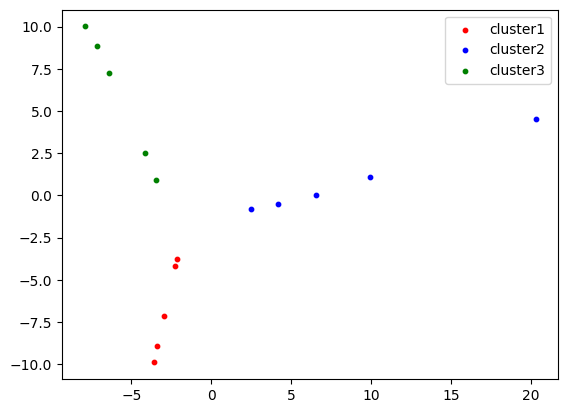

In [92]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#플로팅을 위하여 ca 기법(주성분분석)으로 차원을 2차원으로 축소
pca = PCA(n_components=2,random_state=10)
components = pca.fit_transform(df2)

df3 = pd.DataFrame(data = components, columns = ['component 1', 'component 2'])
df3.index=df['검색어']
print(df3)

kmeans.labels_ == 0

# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0],
            df3.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red',  label = 'cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0],
            df3.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0],
            df3.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()



## 2) KMeans - 뉴스분석

In [93]:
#한글 뉴스 데이터 분석
#출처 : https://teddylee777.github.io/machine-learning/sklearn-kmeans-%ED%99%9C%EC%9A%A9%ED%95%9C-%EB%89%B4%EC%8A%A4%EA%B8%B0%EC%82%AC-%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81

import pandas as pd

df = pd.read_csv('./data/news/news.csv')
df.head()

,category,content,date,hate,id,image,keyword,like,rate,skip,sub_category,title,update_date,url,view_count
0,1,“2028학년도에 수시·정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부...,2019-02-15 02:42:56.000000,0,4,https://pds.joins.com/news/component/htmlphoto...,"대입,교수,수능,시기,학년도",0,0,0,0,“수시·정시 통합해야” vs “수능 무력화 의도”…2028 대입 두고 논란,2019-02-16 17:50:04.872868,https://news.joins.com/article/23373597,0
1,1,최근 열린 삼보국가대표 선발전에서 1위를 한 뒤. 신재용 씨 제공\n\n고교 국가대...,2019-02-16 05:00:00.000000,1,5,http://dimg.donga.com/a/600/0/90/5/wps/NEWS/IM...,"공부,운동,유도,때,대회",0,-2,0,0,“공부하겠다는 내게 감독님이 열쇠 주셔” 서울대 가서도 유도-삼보로 꿈 키워 [양종...,2019-02-16 17:50:05.303722,http://news.donga.com/3/all/20190216/94152869/1,1
2,1,/첨부용/연세대 수험생 대나무숲\n\n우체국 전산 오류로 등록금을 못 내 연세대 합...,2019-02-13 15:00:00.000000,0,6,http://image.chosun.com/sitedata/image/201902/...,"수험,우체국,등록금,글,해당",0,0,0,0,"""등록금 전산 오류로 연대 합격 취소"" 책임 갑론을박",2019-02-16 17:50:05.412111,http://news.chosun.com/site/data/html_dir/2019...,0
3,1,"교육당국, 갑자기 통과 기준 점수 대폭 올려… 폐지 논란 재점화\n\n자사고聯, 교...",2019-02-15 15:00:00.000000,0,7,http://image.chosun.com/sitedata/image/201902/...,"자사고,평가,기준,지표,교육부",2,4,0,0,"""또 자사고 죽이기냐"" 再지정 문턱 높이자 폭발한 학교들",2019-02-16 17:50:05.495572,http://news.chosun.com/site/data/html_dir/2019...,2
4,1,[베리타스알파=권수진 기자] 14일 오후9시 마감한 상위9개대학(고려대 동국대 서강...,2019-02-15 07:37:32.000000,0,8,http://cds.veritas-a.com/news/photo/201902/144...,"충원,모집,추합,과,교육",0,0,0,0,[2019정시충원율] 상위9개대학 57.9%.. ‘상승’.. 추합 4159명,2019-02-16 17:50:06.153964,http://www.veritas-a.com/news/articleView.html...,0


In [94]:
#클래스별 샘플 갯수
df["category"].value_counts()

category
2    4682
1    2872
3    2121
Name: count, dtype: int64

In [95]:
import re

# ^[  ] start, [^ ] not , 한글/영문자만 허용
def preprocessing(sentence):
    sentence =re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', sentence)
    return sentence

#content 필드에 preprocessing 함수 적용
df['content_cleaned'] = df['content'].apply(preprocessing)

content = df['content_cleaned'].tolist()
content[0]



'     학년도에 수시 정시를 통합하겠다는 방안은 수능을 무력화해 대입제도를 학생부종합전형 학종      로 만들겠다는 꼼수다  학종에 대한 불신이 큰 현실을 외면한 채 혼란을 키우고 있는 김경범 서울대 교수를 국가교육회의에서 내보내야 한다  공정사회를위한국민모임 공정사회 은   일 오전   시 정부서울청사에서 기자회견 열고 국가교육회의 위원인 김경범 서울대 서어서문학과 교수의 사퇴를 촉구했다  김 교수가 학종을 옹호하고 있어 공정한 대입제도 개편에 걸림돌이 된다는 주장이다 이처럼     학년도 대입제도를 둘러싼 논란이 확산하고 있다  전날 청주 오송에서 열린 고교학점제 연구학교 교원연수 행사에서 김 교수가 미래 대입 전형을 주제로 발표한 게 불씨가 됐다  김 교수는 국가교육회의  기에서 고등교육전문위원회 위원으로 참여하고 있다 김 교수는 자료집에서  수시와 정시를   월로 통합해 수능 성적과 학생부 면접을 한꺼번에 평가하자 고 제안했다  또 수능 전 과목을 절대평가하고  EBS 연계도 폐지해야 한다고 주장했다      학년도 고교학점제에 따라     학년도 대입을 개편해야 한다면서 이같이 밝힌 것이다 현행 대입은 수시와 정시로 시기가 구분돼 있어 수시는  월  정시는   월 말에 원서를 접수한다  수시 준비하느라 고   학기 때 학교 수업이 제대로 이뤄지지 않는다는 비판은 꾸준히 제기돼 왔다  김 교수의 주장에 따르면 선발 시기를 통합하면 고  교실도 정상화하고 학생 학부모 교사의 부담도 줄일 수 있다는 것이다 이에 대해 대학 관계자와 교사 학부모는 엇갈린 의견을 내놨다  고교 교사는 환영했지만  대학 입학관계자와 학부모는 부정적이었다  서울 일반고의 한 교사는  대입 전형 시기가 나뉘어 있어 교사와 학생 학부모의 부담이 크고  고   학기 수업이 파행된 것은 맞다 며  이번에 나온 방안은 아니더라도 어떤 식으로든 변화가 필요하다 고 말했다 반면 서울 사립대의 한 입학처장은  고교별 수준이 제각각인 상황에서 수능까지 절대평가로 바뀌면 변별력이 크게 약화할 

In [96]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 문서 집합에서 단어 토큰을 생성하고 각 단어의 수를 세어 인코딩한 벡터를 생성
vectorizer = CountVectorizer(max_features=1000) #단어수 제한 (상위출현빈도 1000)
#vectorizer = TfidfVectorizer(max_features=1000) #단어수 제한

X = vectorizer.fit_transform(content)

X.shape

(9675, 1000)

In [97]:
from sklearn.preprocessing import normalize

# l1 오차 절대 
# l2 정규화(TfidfVectorizer의 경우 생략) : 오차 제곱
X = normalize(X)
X[0].toarray()

array([[0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.        , 0.        , 0.07930516, 0.        , 0.        ,
        0.07930516, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.07930516, 0.        ,
        0.        , 0.23791548, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [98]:
from sklearn.cluster import KMeans

# k-means 알고리즘 적용
kmeans = KMeans(n_clusters=3,random_state=10).fit(X)

# labels에 merge
#df['labels'] = kmeans.labels_

print(kmeans.labels_)
print(pd.DataFrame(kmeans.labels_).value_counts())

c:\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 ... 0 0 1]
0    4725
1    3833
2    1117
Name: count, dtype: int64


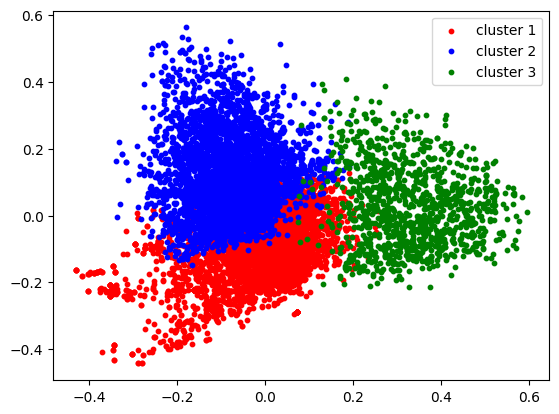

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#그래프 출력을 위해 주성분 분석
pca=PCA(n_components=2, random_state=10)

components=pca.fit_transform(X.toarray())

df3=pd.DataFrame(data=components, columns=['component 1','component 2'])
df3.index=df['category']

plt.scatter(df3.iloc[kmeans.labels_ == 0, 0], df3.iloc[kmeans.labels_ == 0, 1], s=10, c='r', label='cluster 1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0], df3.iloc[kmeans.labels_ == 1, 1], s=10, c='b', label='cluster 2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0], df3.iloc[kmeans.labels_ == 2, 1], s=10, c='g', label='cluster 3')
plt.legend()
plt.show()

## 3) 계층적 클러스터링

In [100]:
#트리 형태의 군집으로 나누는 방법
# 개별대상간의 거리에 의하여 가장 가까이에 있는 대상들로부터 시작하여 결합하여
# 트리 모양의 계층구조를 형성하는 방법

In [101]:
import pandas as pd
df = pd.read_csv('./data/text/군집분석데이터.csv', encoding='cp949')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Hannanum

hannanum = Hannanum() 
docs = []

for i in df['기사내용']:
    #명사 추출
    docs.append(hannanum.nouns(i))

In [108]:
#단어에 공백을 추가    

for i in range(len(docs)):
    docs[i] = ' '.join(docs[i])

#print(docs[:2]) 

In [110]:
vec = CountVectorizer()
X = vec.fit_transform(docs)

df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2.head()

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


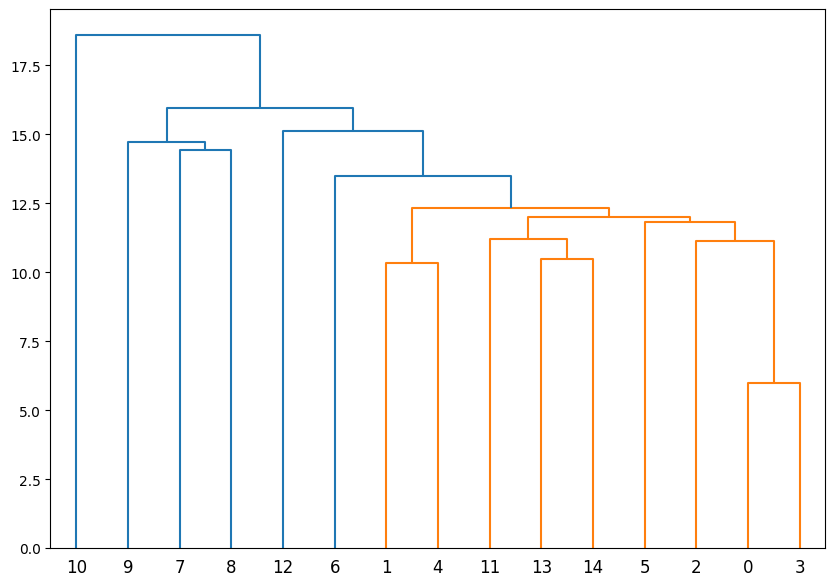

In [111]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

#계층적 클러스터링 : 하나의 데이터 샘플을 하나의 클러스터로 보고 
# 가장 유사도가 높은 클러스터를 합치면서 클러스터 갯수를 줄여가는 방법
#클러스터수를 3으로 설정

cluster = AgglomerativeClustering(n_clusters=3)  
cluster.fit_predict(df2)  

#덴드로그램 출력, 트리를 나타내는 다이어그램
plt.figure(figsize=(10, 7))  
result=shc.linkage(df2)
shc.dendrogram(result)
plt.show()

In [112]:
cluster.labels_

array([2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

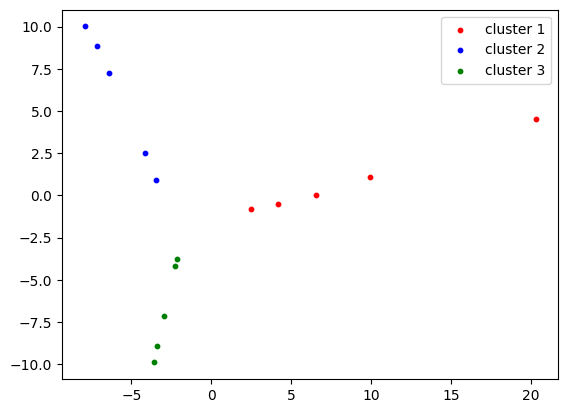

In [113]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#그래프 출력을 위해 주성분 분석
pca=PCA(n_components=2, random_state=10)

components=pca.fit_transform(df2)

df3=pd.DataFrame(data=components, columns=['component 1','component 2'])
df3.index=df['검색어']

plt.scatter(df3.iloc[cluster.labels_ == 0, 0], df3.iloc[cluster.labels_ == 0, 1], s=10, c='r', label='cluster 1')
plt.scatter(df3.iloc[cluster.labels_ == 1, 0], df3.iloc[cluster.labels_ == 1, 1], s=10, c='b', label='cluster 2')
plt.scatter(df3.iloc[cluster.labels_ == 2, 0], df3.iloc[cluster.labels_ == 2, 1], s=10, c='g', label='cluster 3')
plt.legend()
plt.show()

# 7. 감성분석

In [117]:
# 1.단어사전기반 분석 - 감성사전을 이용하여 각 단어의 감정 분류와 그 정도를 알 수 있어야 함
#   텍스트와 감성지수가 사전에 정의되어 있어야 함

import glob
# pip install afinn
from afinn import Afinn

#imdb 데이터셋 5만건의 학습용,검증용 데이터셋 긍정,부정 리뷰로 라벨링되어 있음.
#긍정리뷰데이터 20번째 내용
# glob.glob 특정한 패턴의 파일만 선택하는 함수

pos_review=(glob.glob("./data/imdb/train/pos/*.txt"))[20]

f = open(pos_review)

#파일을 읽음
lines1 = f.readlines()[0]

f.close()

In [118]:
#감성분석 객체
afinn = Afinn()

#텍스트 전처리 후 감성점수 산출
afinn.score(lines1)

8.0

In [119]:
files=list(glob.glob('./data/imdb/train/pos/*.txt')[:10])
files

['./data/train/pos\\0_9.txt',
 './data/train/pos\\10000_8.txt',
 './data/train/pos\\10001_10.txt',
 './data/train/pos\\10002_7.txt',
 './data/train/pos\\10003_8.txt',
 './data/train/pos\\10004_8.txt',
 './data/train/pos\\10005_7.txt',
 './data/train/pos\\10006_7.txt',
 './data/train/pos\\10007_7.txt',
 './data/train/pos\\10008_7.txt']

In [120]:
#학습용 긍정리뷰 10개 파일만 테스트
afinn=Afinn() #감성분석 함수

for i in files:
    f=open(i) #파일 오픈
    lines1=f.readlines()[0] #리스트의 첫번째 문자열
    print(afinn.score(lines1)) #감성점수
    f.close()

-1.0
2.0
19.0
3.0
14.0
8.0
22.0
28.0
13.0
5.0


In [121]:
#부정리뷰데이터 20번째 내용
neg_review=(glob.glob("./data/imdb/train/neg/*.txt"))[20]
f = open(neg_review)
lines2 = f.readlines()[0]
f.close()

In [122]:
afinn.score(lines2)

-4.0

In [123]:
files=list(glob.glob('./data/imdb/train/neg/*.txt')[:10])
files

['./data/train/neg\\0_3.txt',
 './data/train/neg\\10000_4.txt',
 './data/train/neg\\10001_4.txt',
 './data/train/neg\\10002_1.txt',
 './data/train/neg\\10003_1.txt',
 './data/train/neg\\10004_3.txt',
 './data/train/neg\\10005_3.txt',
 './data/train/neg\\10006_4.txt',
 './data/train/neg\\10007_1.txt',
 './data/train/neg\\10008_2.txt']

In [124]:
#학습용 부정리뷰 10개 파일만 테스트
afinn=Afinn() #감성분석 함수

for i in files:
    f=open(i) #파일 오픈
    lines1=f.readlines()[0] #리스트의 첫번째 문자열
    print(afinn.score(lines1)) #감성점수
    f.close()

6.0
-4.0
9.0
5.0
-7.0
1.0
13.0
4.0
7.0
6.0


In [125]:
# 2.기계학습으로 감성분석(시간이 매우 오래 걸림)
import glob

#긍정 텍스트 로딩
pos_review=(glob.glob("./data/imdb/train/pos/*.txt")[:100])
lines_pos=[]

for i in pos_review:
    try:
        f = open(i)
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except :
        continue

len(lines_pos)

100

In [126]:
#부정 텍스트 로딩
neg_review=(glob.glob("./data/imdb/train/neg/*.txt")[:100])
lines_neg=[]

for i in neg_review:
    try:
        f = open(i)
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()

    except :
        continue

len(lines_neg)

100

In [127]:
#긍정,부정 리뷰를 합침
total_text=lines_pos+lines_neg
len(total_text)

200

In [128]:
import numpy as np
from nltk.corpus import stopwords

#긍정,부정 클래스 라벨링
x = np.array(["pos", "neg"])
class_Index=np.repeat(x, [len(lines_pos), len(lines_neg)], axis=0)
stop_words = stopwords.words('english')

In [129]:
#단어들에 Tfidf 가중치를 부여한 후 문서-단어 매트릭스로 바꿈
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words=stop_words).fit(total_text)
X_train_vectorized = vect.transform(total_text)
X_train_vectorized.index = class_Index

In [130]:
import pandas as pd

#데이터프레임으로 변환
df=pd.DataFrame(X_train_vectorized.toarray(), columns=vect.vocabulary_.keys())
df.head()

,bromwell,high,cartoon,comedy,ran,time,programs,school,life,teachers,...,zombified,auteur,ample,opportunities,golden,geist,uttered,downloading,midget,tricking
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
for idx,value in enumerate(X_train_vectorized[0].toarray()[0]):  
    if value>0:
        print(idx, value)

64 0.10070285188783222
189 0.10070285188783222
212 0.09513664322740871
585 0.06603504311540802
773 0.43419192948676516
816 0.10070285188783222
893 0.09081915636680153
1038 0.07740781722251895
1066 0.09513664322740871
1105 0.0708975934136058
1921 0.09081915636680153
2034 0.0708975934136058
2128 0.06498892497285297
2174 0.10854798237169129
2210 0.10070285188783222
2727 0.3478134336932994
2903 0.10070285188783222
3008 0.10854798237169129
3013 0.10854798237169129
3249 0.07944638225969057
3320 0.09081915636680153
3387 0.049185844603996734
3407 0.06831396493884356
3563 0.04746484661907397
3828 0.040035828354977356
4031 0.031912297780574375
4179 0.09081915636680153
4242 0.10854798237169129
4288 0.10070285188783222
4358 0.10854798237169129
4480 0.10070285188783222
4487 0.10854798237169129
4618 0.10070285188783222
4664 0.09513664322740871
4676 0.10854798237169129
4757 0.09081915636680153
4772 0.10070285188783222
4872 0.06305246292974673
4956 0.10854798237169129
4992 0.10854798237169129
5001 0.0

In [132]:
#로지스틱 회귀 모형
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=10)
logit.fit(X_train_vectorized, class_Index)

LogisticRegression(random_state=10)

In [133]:
#긍정 리뷰들을 하나씩 불러와서 실험
def pos_review(model):
    count_all=0
    count=0
    num=100
    tests1=[]
    
    for idx in range(0,num):
        pos_review_test=(glob.glob("./data/imdb/test/pos/*.txt"))[idx]
        f = open(pos_review_test, 'r',encoding="utf-8")
        tests1.append(f.readlines())
        f.close()

    for test in tests1:
        pred = model.predict(vect.transform(test))
        result=pred[0]
        
        if result=="pos":
            count+=1
        count_all += 1
        
    rate= count*100/count_all
    
    print(f"분류정확도:{rate:.1f}%")

In [134]:
#부정 리뷰들을 하나씩 불러와서 실험
def neg_review(model):
    count_all=0
    count=0
    num=100
    tests2=[]

    for idx in range(0,num):
        neg_review_test=(glob.glob("./data/imdb/test/neg/*.txt"))[idx]
        f = open(neg_review_test, 'r',encoding="utf-8")
        tests2.append(f.readlines())
        f.close()

    for test in tests2:
        preds = model.predict(vect.transform(test))
        result=preds[0]

        if result=="neg":
            count+=1
        count_all+=1
    rate= count*100/count_all
    print("예측정확도:{0:.1f}%".format(rate))

pos_review(logit)
neg_review(logit)

분류정확도:66.0%
예측정확도:81.0%


In [135]:
#의사결정나무 모형
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)
tree.fit(X_train_vectorized, class_Index)
pos_review(tree)
neg_review(tree)

분류정확도:39.0%
예측정확도:66.0%


In [136]:
#랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

#10개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=10, random_state=10)
forest.fit(X_train_vectorized, class_Index)
pos_review(forest)
neg_review(forest)

분류정확도:44.0%
예측정확도:75.0%


In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_vectorized, class_Index)
pos_review(knn)
neg_review(knn)

분류정확도:34.0%
예측정확도:85.0%


In [138]:
#인공신경망
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=10)
mlp.fit(X_train_vectorized, class_Index)
pos_review(mlp)
neg_review(mlp)

분류정확도:58.0%
예측정확도:79.0%


In [139]:
#SVM 모형
from sklearn.svm import SVC

svm = SVC(random_state=10)
svm.fit(X_train_vectorized, class_Index)
pos_review(svm)
neg_review(svm)

분류정확도:63.0%
예측정확도:87.0%


# 8. 연관어 분석

## 1) 동시출현빈도 기반

In [1]:
import glob

# 긍정리뷰 100개 로딩
pos_review=(glob.glob("./data/imdb/train/pos/*.txt"))[0:100]

lines_pos=[]

for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except :
        continue
    
len(lines_pos)

100

In [3]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import pandas as pd

tokenizer = RegexpTokenizer('[\w]+') #알파벳, 숫자, _ 외는 버리겠다.
stop_words = stopwords.words('english')

#동시출현 단어 계산
count = {}   #동시출현 빈도가 저장될 dict

for line in lines_pos:
    words =  line.lower() # 소문자로 변경
    tokens = tokenizer.tokenize(words) # 단어 나누기

    #불용어 제거, 불용어에 br 추가
    stopped_tokens = [i for i in list(set(tokens)) if i not in stop_words+["br"]]

    #글자수가 1인 단어 제외
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

    for i, a in enumerate(stopped_tokens2): # enumerate : 인덱스와 값을 리턴
        for b in stopped_tokens2[i+1:]:
            if a>b: # 알파벳 문자 순서를 검사
                count[b, a] = count.get((b, a),0) + 1  # 없으면 0 있으면 키값을 꺼내오세요
            else :
                count[a, b] = count.get((a, b),0) + 1   

In [22]:
count.get(('insane','making'),0)

1

In [21]:
count['insane','making']

1

In [4]:
#딕셔너리로부터 데이터프레임 생성
df=pd.DataFrame.from_dict(count, orient='index')

#리스트 구성
list1=[]

for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

In [5]:
df2=pd.DataFrame(list1, columns=["term1","term2","freq"])
df3=df2.sort_values(by=['freq'],ascending=False)
df3_pos=df3.reset_index(drop=True)

#동시출현 단어 페어 빈도 상위 20개 출력
df3_pos.head(20)

#film과 story 총 41회 동시에 출현

,term1,term2,freq
0,movie,one,41
1,film,story,41
2,movie,story,35
3,film,movie,35
4,one,story,33
5,good,movie,32
6,film,one,31
7,movie,see,30
8,one,see,27
9,film,like,27


In [6]:
#부정 리뷰에 적용
neg_review=(glob.glob("./data/imdb/train/neg/*.txt"))[0:100]

lines_neg=[]

for i in neg_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_neg.append(temp)
        f.close()
    except Exception as e:
        continue

len(lines_neg)

100

In [7]:
count = {}   #동시출현 빈도가 저장될 dict

for line in lines_neg:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if not i in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]

    for i, a in enumerate(stopped_tokens2):
        for b in stopped_tokens2[i+1:]:
            if a>b:
                count[b, a] = count.get((b, a),0) + 1  
            else :
                count[a, b] = count.get((a, b),0) + 1

In [8]:
df=pd.DataFrame.from_dict(count, orient='index')
list1=[]

for i in range(len(df)):
    list1.append([df.index[i][0],df.index[i][1],df[0][i]])

df2=pd.DataFrame(list1, columns=["term1","term2","freq"])
df3=df2.sort_values(by=['freq'],ascending=False)
df3_neg=df3.reset_index(drop=True)
df3_neg.head(20)

#film과 movie가 총 42회 동시에 출현

,term1,term2,freq
0,film,movie,42
1,like,movie,40
2,movie,one,38
3,film,one,35
4,like,one,33
5,good,movie,32
6,even,movie,32
7,even,like,31
8,good,one,30
9,film,like,29


## 2) 통계적 가중치 기반

In [ ]:
# 통계적으로 가중치를 구한 후 두 단어 간의 유사도를 단어간의 연관도로 적용하는 방법
#  1.단어마다 가중치를 할당해야 함(출현빈도, tf-idf 등으로 계산)
#  2.단어간의 유사도 계산(cosine similarity 등의 방법)

In [24]:
import glob

#긍정리뷰 100개 불러오기
pos_review=(glob.glob("./data/imdb/train/pos/*.txt"))[0:100]

lines_pos=[]

for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except :
        continue
    
len(lines_pos)

100

In [27]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')

#TF-IDF 가중치 할당
vec = TfidfVectorizer(stop_words=stop_words)
vector_lines_pos = vec.fit_transform(lines_pos) # 희소행렬
A=vector_lines_pos.toarray() # 밀집행렬로 변환 (모든 값을 표시하기때문에 메모리가 낭비 될 수 있음)

print(A.shape)
print(A)

#x축 단어, y축 문서

(100, 4001)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06538462 0.         ... 0.         0.         0.        ]
 [0.         0.23078109 0.         ... 0.         0.         0.        ]]


In [28]:
#현재 상태는 100개의 문서의 유사도
#단어간의 유사도를 구하는 것이 목적이므로
#단어-문서 행렬로 변경
#x축 문서, y축 단어

A=A.transpose()

print(A.shape)
print(A)

(4001, 100)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.06538462 0.23078109]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [29]:
import numpy as np
from scipy import sparse

#밀집행렬(dense array)
a=np.array([[0.5,0,0],[0,1,0],[0.7,0,1.5]])

#밀집표현을 희소표현으로 (sparse array)로 변환
#밀집표현의 단점: 0이 많을 경우 메모리 낭비가 될 수 있음
#희소표현은 0이 아닌 값들의 위치와 값만 기록하여 메모리를 절약하는 방식

b=sparse.csr_matrix(a) # 희소표현으로 바꿔라

print(b)

# (0,0) 0.5 => 인덱스 0,0에 값 0.5
# (1,1) 1 => 인덱스 1,1에 값 1
# (2,0) 0.7 => 인덱스 2,0에 값 0.7
# (2,2) 1 => 인덱스 2,2에 값 1.5

c=b.toarray() #희소표현 형식을 밀집표현형식으로 변환

print(c)

  (0, 0)	0.5
  (1, 1)	1.0
  (2, 0)	0.7
  (2, 2)	1.5
[[0.5 0.  0. ]
 [0.  1.  0. ]
 [0.7 0.  1.5]]


In [30]:
from sklearn.metrics.pairwise import cosine_similarity

A_sparse = sparse.csr_matrix(A)

#코사인 유사도 계산
similarities_sparse = cosine_similarity(A_sparse,dense_output=False)

# todok() 행렬을 딕셔너리 형태로 변환
list(similarities_sparse.todok().items())[35000:35010]

#list(similarities_sparse.todok().items())[-10:]
#단어 이름이 아닌 인덱스 형태로 출력됨

[((108, 1469), 0.37803585968894865),
 ((108, 1470), 0.2189685434746738),
 ((108, 1476), 0.06407477897013734),
 ((108, 1477), 0.185189577514238),
 ((108, 1480), 0.20111036876169444),
 ((108, 1489), 0.06995711757772019),
 ((108, 1496), 0.10714874067068783),
 ((108, 1503), 0.30487333830091773),
 ((108, 1504), 0.30487333830091773),
 ((108, 1512), 0.30487333830091773)]

In [31]:
# (1469,108), 0.37 1469 단어와 108 단어의 유사도는 37%
vec.get_feature_names_out()[1469]

'fraud'

In [32]:
import pandas as pd
import numpy as np

#위의 결과값을 데이터프레임으로 출력
df=pd.DataFrame(list(similarities_sparse.todok().items()),columns=["words","weight"])
df2=df.sort_values(by=['weight'],ascending=False)
df2=df2.reset_index(drop=True)

#단어 자신끼리의 짝은 1이 되므로 1보다 작은 항목들만 출력시킴
df3=df2.loc[np.round(df2['weight']) < 1]
df3=df3.reset_index(drop=True)
df3.head(10)

,words,weight
0,"(3372, 3971)",0.499961
1,"(3971, 3372)",0.499961
2,"(2554, 1192)",0.499958
3,"(1192, 2554)",0.499958
4,"(1321, 2468)",0.499957
5,"(710, 2468)",0.499957
6,"(2468, 710)",0.499957
7,"(2468, 1321)",0.499957
8,"(889, 2146)",0.499909
9,"(2146, 889)",0.499909


In [33]:
for i,row in enumerate(df3.iterrows()): # 데이터프레임의 개별행을 반복시킴
    a=vec.get_feature_names_out()[row[1][0][0]]
    b=vec.get_feature_names_out()[row[1][0][1]]
    print(f'{a},{b}=>{row[1][1]:.2f}')

    if i>10:
        break

stop,writers=>0.50
writers,stop=>0.50
past,essence=>0.50
essence,past=>0.50
farewell,older=>0.50
concubine,older=>0.50
older,concubine=>0.50
older,farewell=>0.50
deeply,made=>0.50
made,deeply=>0.50
watch,classes=>0.50
classes,watch=>0.50


## 3) word2vec 기반

In [ ]:
# word2vec 단어를 벡터로
# doc2vec 문서를 벡터로
# char2vec 문자를 벡터로

In [ ]:
# 단어의 의미는 그 단어 주변 단어의 분포로 이해될 수 있다
# 단어의 의미는 단어 벡터 안에 인코딩될 수 있다.
# 단순히 출현횟수만을 고려하는 것이 아닌 단어 위치, 순서도 고려하는 방법
# CBOW  주변 단어로 중심 단어를 예측하는 방법
# Skip-gram 중심 단어로 주변 단어를 예측하는 방법(더 많이 사용되는 방법)

In [36]:
import glob

pos_review=(glob.glob("./data/imdb/train/pos/*.txt"))[0:100]
lines_pos=[]

for i in pos_review:
    try:
        f = open(i, 'r')
        temp = f.readlines()[0]
        lines_pos.append(temp)
        f.close()
    except :
        continue

len(lines_pos)

100

In [38]:
from nltk.corpus import stopwords
from gensim.models.word2vec import Word2Vec
from nltk.tokenize import RegexpTokenizer

stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer('[\w]+')

#단어 추출
text=[]

for line in lines_pos:
    words =  line.lower()
    tokens = tokenizer.tokenize(words)
    stopped_tokens = [i for i in list(set(tokens)) if i not  in stop_words+["br"]]
    stopped_tokens2 = [i for i in stopped_tokens if len(i)>1]
    text.append(stopped_tokens2)

# word2vec 모형 생성 , sg=1 skip-gram을 적용, window=2 중심 단어로부터 좌우 2개의 단어까지 학습에 적용
#min_count=3 최소 3회 이상 출현한 단어들을 대상으로 학습
model = Word2Vec(text, vector_size=10, sg=1, window=2, min_count=3)

# 두 단어의 유사도 계산
model.wv.similarity('film', 'movie')

0.94247925

In [39]:
#good과 가장 유사한 단어 5개
model.wv.most_similar("good",topn =5)

# 단점 : 사전에 없는 단어를 넣을 경우 에러
# 학습이 안된 단어의 경우 알 수 없음

[('room', 0.950555145740509),
 ('excellent', 0.938276469707489),
 ('films', 0.9285984039306641),
 ('today', 0.9272653460502625),
 ('character', 0.9210695624351501)]

In [40]:
#모델에 저장된 단어의 갯수
len(model.wv.index_to_key)

895

In [41]:
#모델에 저장된 단어 텍스트
model.wv.index_to_key[0]

'movie'

In [42]:
#단어에 해당하는 벡터값
model.wv.vectors[0]

array([ 0.16488194, -0.10504074,  0.24073823,  0.05735524,  0.03136041,
       -0.09426065,  0.2606985 ,  0.30138797, -0.2121569 , -0.21124399],
      dtype=float32)